In [ ]:
import os
import time
#mysys="jupyter" #
mysys="colab"
split="_90_5_5b_"
sn='sn_'
test_ratio=0.05

training_samples=167400
testing_samples=9300
validation_samples=9300

if mysys=="colab":
    from google.colab import drive
    drive.mount('/content/drive')
    in_path='/content/drive/MyDrive/UNSW_Data/'
    datapath='/content/drive/MyDrive/ANN_Edge/unsw_data/final4/'
    modelpath='/content/drive/MyDrive/ANN_Edge/unsw_data/final4/models15000/'
    slash="/"
    ML_path=datapath+'ml2/'
    STDN_path=ML_path+ '/ml/stdn/'
else:
    current_folder = os.getcwd()
    print(current_folder)
    in_path=current_folder + '\\data\\'
    datapath=current_folder +'\\final4\\'
    modelpath=current_folder +'\\models14004\\'
    slash="\\"

print(in_path)
print(datapath)
performance_metrics=[]
hp_array=[]

in_f_train= in_path + 'UNSW_NB15_training-set.csv'
in_f_test=in_path+'UNSW_NB15_testing-set.csv'
f_features=in_path+ 'UNSW_NB15_f.csv'
out_f_train=datapath+'unsw-nb15_training' + split +'.csv'
out_f_test=datapath+'unsw-nb15_testing' + split+ '.csv'
out_f_validation=datapath+'unsw-nb15_validation' + split+ '.csv'

shallow_model_path=modelpath+ 'shallow_model_ANN5.keras'
deep_model_path=modelpath+ 'deep_model_ANN5.keras'

shallow_model_path_best_hp=modelpath+ 'shallow_model_ANN5_hp.keras'
deep_model_path_best_hp=modelpath+ 'deep_model_ANN5_hp.keras'

in_f_features=in_path + 'UNSW_NB15_f.csv'

f_performance_path=modelpath+ 'cp2_data_performance.csv'
f_hp_path=modelpath+ 'cp2_hp.csv'


print(in_f_train)
print(in_f_test)
print(in_f_features)
print(out_f_train)
print(out_f_test)
print(out_f_validation)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/UNSW_Data/
/content/drive/MyDrive/ANN_Edge/unsw_data/final4/
/content/drive/MyDrive/UNSW_Data/UNSW_NB15_training-set.csv
/content/drive/MyDrive/UNSW_Data/UNSW_NB15_testing-set.csv
/content/drive/MyDrive/UNSW_Data/UNSW_NB15_f.csv
/content/drive/MyDrive/ANN_Edge/unsw_data/final4/unsw-nb15_training_90_5_5b_.csv
/content/drive/MyDrive/ANN_Edge/unsw_data/final4/unsw-nb15_testing_90_5_5b_.csv
/content/drive/MyDrive/ANN_Edge/unsw_data/final4/unsw-nb15_validation_90_5_5b_.csv


In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Define the features
features = ['ct_state_ttl', 'sload', 'rate', 'sttl', 'smean', 'dload', 'sbytes', 'ct_srv_dst', 'ct_dst_src_ltm', 'dbytes', 'ackdat', 'dttl', 'ct_dst_sport_ltm', 'dmean','ct_srv_src', 'dinpkt', 'tcprtt', 'dur', 'synack', 'sinpkt']
#features2= ['ct_state_ttl', 'sload', 'rate', 'sttl', 'smean', 'dload', 'sbytes', 'ct_srv_dst', 'ct_dst_src_ltm', 'dbytes', 'ackdat', 'dttl', 'ct_dst_sport_ltm', 'dmean', 'ct_srv_src', 'dinpkt', 'tcprtt', 'dur', 'synack', 'sinpkt'], 'proto', 'dport', 'stime']

# Load preprocessed data for training and testing
df_train = pd.read_csv(out_f_train)
df_test = pd.read_csv(out_f_test)
df_val = pd.read_csv(out_f_validation)
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167400 entries, 0 to 167399
Data columns (total 45 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   id                 167400 non-null  int64  
 1   dur                167400 non-null  float64
 2   proto              167400 non-null  object 
 3   service            167400 non-null  object 
 4   state              167400 non-null  object 
 5   spkts              167400 non-null  int64  
 6   dpkts              167400 non-null  int64  
 7   sbytes             167400 non-null  int64  
 8   dbytes             167400 non-null  int64  
 9   rate               167400 non-null  float64
 10  sttl               167400 non-null  int64  
 11  dttl               167400 non-null  int64  
 12  sload              167400 non-null  float64
 13  dload              167400 non-null  float64
 14  sloss              167400 non-null  int64  
 15  dloss              167400 non-null  int64  
 16  si

In [ ]:
all_columns = df_train.columns.tolist()
all_columns

['id',
 'dur',
 'proto',
 'service',
 'state',
 'spkts',
 'dpkts',
 'sbytes',
 'dbytes',
 'rate',
 'sttl',
 'dttl',
 'sload',
 'dload',
 'sloss',
 'dloss',
 'sinpkt',
 'dinpkt',
 'sjit',
 'djit',
 'swin',
 'stcpb',
 'dtcpb',
 'dwin',
 'tcprtt',
 'synack',
 'ackdat',
 'smean',
 'dmean',
 'trans_depth',
 'response_body_len',
 'ct_srv_src',
 'ct_state_ttl',
 'ct_dst_ltm',
 'ct_src_dport_ltm',
 'ct_dst_sport_ltm',
 'ct_dst_src_ltm',
 'is_ftp_login',
 'ct_ftp_cmd',
 'ct_flw_http_mthd',
 'ct_src_ltm',
 'ct_srv_dst',
 'is_sm_ips_ports',
 'attack_cat',
 'label']

In [ ]:
selected_columns = ['proto', 'service', 'state']
selected_data = df_train[selected_columns]
selected_data

,proto,service,state
0,tcp,-,FIN
1,tcp,-,FIN
2,udp,dns,INT
3,unas,-,INT
4,tcp,-,FIN
...,...,...,...
167395,tcp,http,FIN
167396,tcp,-,FIN
167397,tcp,http,FIN
167398,tcp,-,FIN


In [ ]:
selected_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167400 entries, 0 to 167399
Data columns (total 3 columns):
 #   Column   Non-Null Count   Dtype 
---  ------   --------------   ----- 
 0   proto    167400 non-null  object
 1   service  167400 non-null  object
 2   state    167400 non-null  object
dtypes: object(3)
memory usage: 3.8+ MB


In [ ]:
proto_value_counts = selected_data['state'].value_counts()

# Print all unique values along with their counts
print("Value counts for 'proto' column:")
for value, count in proto_value_counts.items():
    print(f"{value}: {count}")

Value counts for 'proto' column:
FIN: 83573
INT: 63119
CON: 17578
REQ: 3045
RST: 74
ECO: 8
URN: 1
ACC: 1
no: 1


In [ ]:
# Get value counts for each column
for col in selected_data.columns:
    print(f"Value counts for {col}:")
    print(selected_data[col].value_counts())
    print()  # Print a blank line for separation

Value counts for proto:
proto
tcp     88687
udp     55994
unas     7740
arp      3480
ospf     1754
        ...  
sm         55
ipip       53
zero       50
ggp        49
icmp       10
Name: count, Length: 132, dtype: int64

Value counts for service:
service
-           96843
dns         39319
http        17342
smtp         4388
ftp-data     4000
ftp          3254
ssh          1278
pop3          801
dhcp           60
snmp           54
ssl            38
irc            13
radius         10
Name: count, dtype: int64

Value counts for state:
state
FIN    83573
INT    63119
CON    17578
REQ     3045
RST       74
ECO        8
URN        1
ACC        1
no         1
Name: count, dtype: int64



In [ ]:
features1 = df_train.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Display the list of numerical "columns
features1.remove("label")
print("Numerical Fields:")

print(features1)
print(len(features1))


Numerical Fields:
['id', 'dur', 'spkts', 'dpkts', 'sbytes', 'dbytes', 'rate', 'sttl', 'dttl', 'sload', 'dload', 'sloss', 'dloss', 'sinpkt', 'dinpkt', 'sjit', 'djit', 'swin', 'stcpb', 'dtcpb', 'dwin', 'tcprtt', 'synack', 'ackdat', 'smean', 'dmean', 'trans_depth', 'response_body_len', 'ct_srv_src', 'ct_state_ttl', 'ct_dst_ltm', 'ct_src_dport_ltm', 'ct_dst_sport_ltm', 'ct_dst_src_ltm', 'is_ftp_login', 'ct_ftp_cmd', 'ct_flw_http_mthd', 'ct_src_ltm', 'ct_srv_dst', 'is_sm_ips_ports']
40


In [ ]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9300 entries, 0 to 9299
Data columns (total 45 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 9300 non-null   int64  
 1   dur                9300 non-null   float64
 2   proto              9300 non-null   object 
 3   service            9300 non-null   object 
 4   state              9300 non-null   object 
 5   spkts              9300 non-null   int64  
 6   dpkts              9300 non-null   int64  
 7   sbytes             9300 non-null   int64  
 8   dbytes             9300 non-null   int64  
 9   rate               9300 non-null   float64
 10  sttl               9300 non-null   int64  
 11  dttl               9300 non-null   int64  
 12  sload              9300 non-null   float64
 13  dload              9300 non-null   float64
 14  sloss              9300 non-null   int64  
 15  dloss              9300 non-null   int64  
 16  sinpkt             9300 

In [ ]:
df_val.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9300 entries, 0 to 9299
Data columns (total 45 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 9300 non-null   int64  
 1   dur                9300 non-null   float64
 2   proto              9300 non-null   object 
 3   service            9300 non-null   object 
 4   state              9300 non-null   object 
 5   spkts              9300 non-null   int64  
 6   dpkts              9300 non-null   int64  
 7   sbytes             9300 non-null   int64  
 8   dbytes             9300 non-null   int64  
 9   rate               9300 non-null   float64
 10  sttl               9300 non-null   int64  
 11  dttl               9300 non-null   int64  
 12  sload              9300 non-null   float64
 13  dload              9300 non-null   float64
 14  sloss              9300 non-null   int64  
 15  dloss              9300 non-null   int64  
 16  sinpkt             9300 

In [ ]:
# Separate features and labels for training set
X_train = df_train[features1].values # assuming 'label' is the column containing labels
y_train = df_train['label'].values

# Separate features and labels for testing set
X_test = df_test[features1].values  # assuming 'label' is the column containing labels
y_test = df_test['label'].values

# Separate features and labels for testing set
X_val =df_val[features1].values  # assuming 'label' is the column containing labels
y_val =df_val['label'].values

print(X_train.shape, y_train.shape, X_test.shape, y_test.shape, X_val.shape,y_val.shape)
print(X_train.shape[0]/(X_train.shape[0]+ X_test.shape[0]))
print(X_test.shape[0]/(X_test.shape[0]+ X_test.shape[0]))
print(X_val.shape[0]/(X_val.shape[0]+ X_val.shape[0]))

(167400, 40) (167400,) (9300, 40) (9300,) (9300, 40) (9300,)
0.9473684210526315
0.5
0.5


In [ ]:
# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
X_val = scaler.transform(X_val)

In [ ]:
import time
import psutil
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, average_precision_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.metrics import confusion_matrix


def get_system_info():
    # Get CPU and memory usage
    cpu_usage = psutil.cpu_percent()
    memory_usage = psutil.virtual_memory().percent
    return cpu_usage, memory_usage

# Define function to calculate training and testing time
def calculate_time(start_time):
    end_time = time.time()
    elapsed_time = end_time - start_time
    return elapsed_time

def evaluate_performance(title, test_loss, test_accuracy, y_test, y_preds, cpu_use, mem_use, training_time, test_time,  prt):
    #accuracy = accuracy_score(y_test, y_preds)
    precision = precision_score(y_test, y_preds)
    recall = recall_score(y_test, y_preds)
    f1 = f1_score(y_test, y_preds)
    roc_auc = roc_auc_score(y_test, y_preds)
    avg_precision = average_precision_score(y_test, y_preds)
    conf_matrix = confusion_matrix(y_test, y_preds)

    metrics ={
        'data': title,
        'time': time.time(),
        'Training time':  training_time,
        'test time':test_time,
        'memory usage':mem_use,
        'cpu usage': cpu_use,
        'accuracy': test_accuracy,
        'loss' :test_loss,
        'precision':  precision,
        'recall' : recall,
        'f1_score':   f1,
        'roc_auc' :roc_auc,
        'avg_precision':avg_precision,
        'conf_matrix':  conf_matrix,
    }

    if prt == 1:
        print(title, "Model Performance: ")
        print ('Training time',  training_time)
        print ('Testing time',  test_time)
        print ('Memory Usage', mem_use)
        print ('CPU usage', cpu_use)
        print("Test Accuracy:", test_accuracy)
        print("Test Loss:", test_loss)
        print("Precision:", precision)
        print("Recall:", recall)
        print("F1-score:", f1)
        print("roc_auc", roc_auc)
        print("avg_precision",avg_precision)
        print("Confusion Matrix:")
        print(conf_matrix)

    return metrics

# Define function to display performance metrics
def display_metrics(test_loss, test_accuracy, val_accuracy, precision, recall, f1, roc_auc, avg_precision):
    print("Test Loss:", test_loss)
    print("Test Accuracy:", test_accuracy)
    print("Validation Accuracy:", val_accuracy)
    print("Precision:", precision)
    print("Recall:", recall)
    print("F1 Score:", f1)
    print("ROC-AUC Score:", roc_auc)
    print("Average Precision Score:", avg_precision)

## Shallow *ANN* Model

In [ ]:
# Define Shallow model hyperparameters
shallow_hyperparameters = {
    'input_dim': len(features1),
    'neurons_layer1': 512,
    'activation_layer1': 'relu',
    'learning_rate': 0.0001
}

# Define paths and model name
modelpath = shallow_model_path
model_name = 'shallow_model_ANN'
input_dim=X_train.shape[1]
print(input_dim)


40


In [ ]:
from sklearn.metrics import confusion_matrix
# Define shallow ANN model function
def create_shallow_ann_model(input_dim, neurons_layer1, activation_layer1, learning_rate):
    model = Sequential()

    # hidden layer 1
    model.add(Dense(neurons_layer1, input_dim=input_dim, activation=activation_layer1))

    # Output layer
    model.add(Dense(1, activation='sigmoid'))

    # Compile model
    optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)
    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

    return model


# Create the shallow ANN model with the best hyperparameters
start_time = time.time()
shallow_model = create_shallow_ann_model(**shallow_hyperparameters)
train_time = calculate_time(start_time)

# Train the model on the training data
start_time = time.time()
history = shallow_model.fit(X_train, y_train, epochs=20, batch_size=32, validation_split=0.2)
cpu_usage, memory_usage=get_system_info()
train_time += calculate_time(start_time)

# Evaluate the model on the test set
start_time = time.time()
test_loss, test_accuracy = shallow_model.evaluate(X_test, y_test)
test_time = calculate_time(start_time)

# Calculate additional performance metrics on the validation set
y_pred_val = shallow_model.predict(X_test)

val_accuracy = accuracy_score(y_test, np.round(y_pred_val))
precision = precision_score(y_test, np.round(y_pred_val))
recall = recall_score(y_test, np.round(y_pred_val))
f1 = f1_score(y_test, np.round(y_pred_val))
roc_auc = roc_auc_score(y_test, y_pred_val)
avg_precision = average_precision_score(y_test, y_pred_val)
# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_test, np.round(y_pred_val))

# Display performance metrics
display_metrics(test_loss, test_accuracy, val_accuracy, precision, recall, f1, roc_auc, avg_precision)
summary=shallow_model.summary()
print(summary)

# Save the trained model for inference
#joblib.dump(shallow_model, modelpath)
tf.keras.models.save_model(shallow_model, modelpath)
# Collect memory usage, CPU usage, and append to an array
metrics = {
    'Time':time.time(),
    'Model': model_name,
    'Training Time': train_time,
    'Testing Time': test_time,
    'Memory Usage': memory_usage,
    'CPU Usage': cpu_usage,
    'Test Loss': test_loss,
    'Test Accuracy': test_accuracy,
    'Validation Accuracy': val_accuracy,
    'Precision': precision,
    'Recall': recall,
    'F1 Score': f1,
    'ROC-AUC Score': roc_auc,
    'Average Precision Score': avg_precision,
    "Confusion Matrix" : conf_matrix
}


Epoch 1/20
4185/4185 [==============================] - 17s 3ms/step - loss: 0.2524 - accuracy: 0.8848 - val_loss: 0.1988 - val_accuracy: 0.9066
Epoch 2/20
4185/4185 [==============================] - 10s 2ms/step - loss: 0.1813 - accuracy: 0.9160 - val_loss: 0.1705 - val_accuracy: 0.9195
Epoch 3/20
4185/4185 [==============================] - 10s 2ms/step - loss: 0.1615 - accuracy: 0.9259 - val_loss: 0.1582 - val_accuracy: 0.9280
Epoch 4/20
4185/4185 [==============================] - 11s 3ms/step - loss: 0.1526 - accuracy: 0.9311 - val_loss: 0.1522 - val_accuracy: 0.9318
Epoch 5/20
4185/4185 [==============================] - 10s 2ms/step - loss: 0.1468 - accuracy: 0.9346 - val_loss: 0.1476 - val_accuracy: 0.9368
Epoch 6/20
4185/4185 [==============================] - 10s 2ms/step - loss: 0.1431 - accuracy: 0.9364 - val_loss: 0.1441 - val_accuracy: 0.9384
Epoch 7/20
4185/4185 [==============================] - 11s 3ms/step - loss: 0.1399 - accuracy: 0.9389 - val_loss: 0.1430 - val_ac

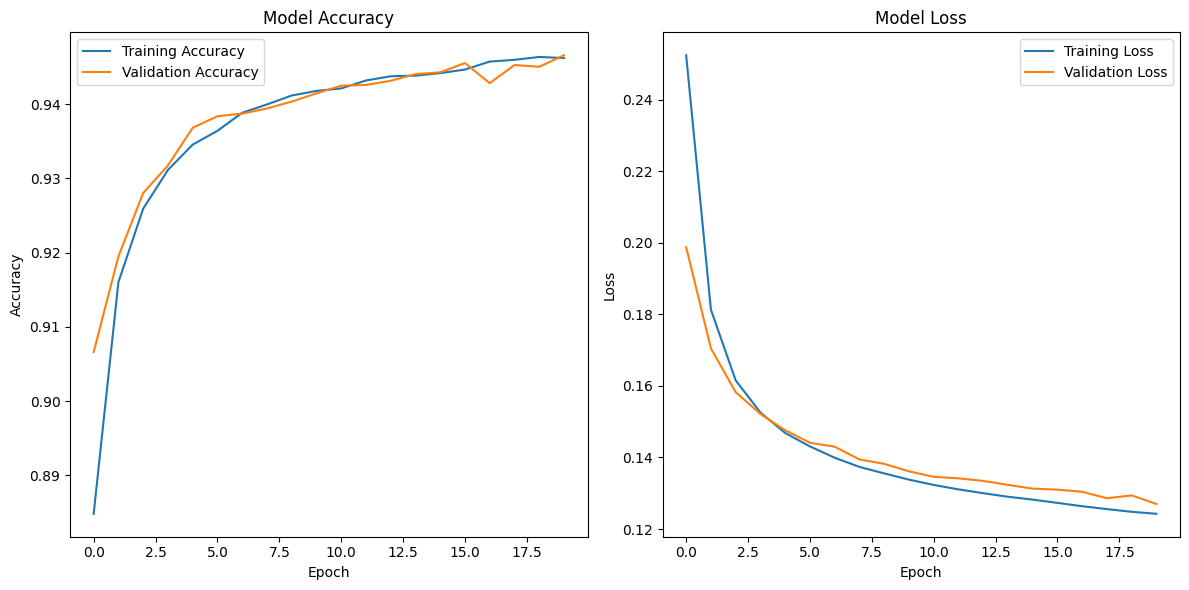

In [ ]:
import matplotlib.pyplot as plt

# Create a figure with subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

# Plot accuracy
axes[0].plot(history.history['accuracy'], label='Training Accuracy')
axes[0].plot(history.history['val_accuracy'], label='Validation Accuracy')
axes[0].set_title('Model Accuracy')
axes[0].set_xlabel('Epoch')
axes[0].set_ylabel('Accuracy')
axes[0].legend()

# Plot loss
axes[1].plot(history.history['loss'], label='Training Loss')
axes[1].plot(history.history['val_loss'], label='Validation Loss')
axes[1].set_title('Model Loss')
axes[1].set_xlabel('Epoch')
axes[1].set_ylabel('Loss')
axes[1].legend()

plt.tight_layout()
plt.show()


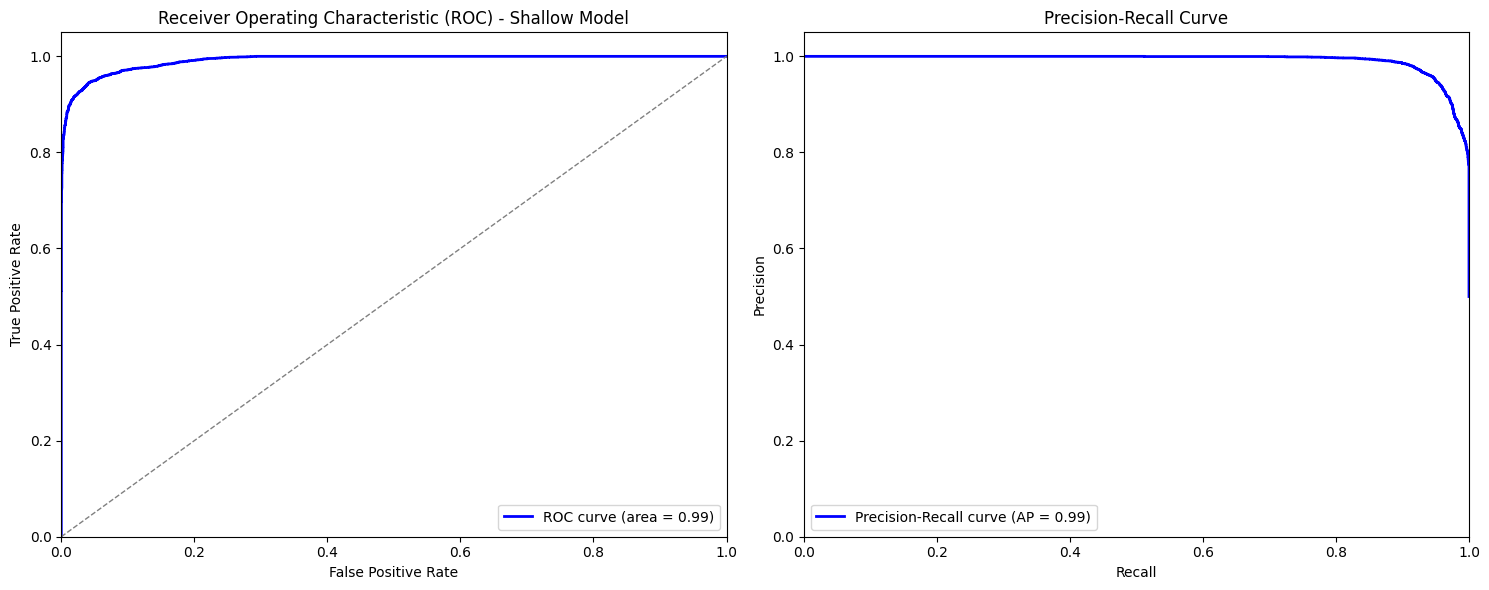

In [ ]:
from sklearn.metrics import roc_curve, auc, precision_recall_curve, average_precision_score
import matplotlib.pyplot as plt

# Calculate ROC curve
fpr, tpr, thresholds_roc = roc_curve(y_test, y_pred_val)
roc_auc = auc(fpr, tpr)

# Calculate Precision-Recall curve
precision, recall, thresholds_pr = precision_recall_curve(y_test, y_pred_val)
average_precision = average_precision_score(y_test, y_pred_val)

# Plot ROC curve and Precision-Recall curve as subplots
plt.figure(figsize=(15, 6))

# Plot ROC curve
plt.subplot(1, 2, 1)
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) - Shallow Model')
plt.legend(loc="lower right")

# Plot Precision-Recall curve
plt.subplot(1, 2, 2)
plt.plot(recall, precision, color='blue', lw=2, label='Precision-Recall curve (AP = %0.2f)' % average_precision)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc="lower left")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])

plt.tight_layout()
plt.show()


In [ ]:
#Append the metrics to an array
performance_metrics.append(metrics)

# Convert performance_metrics array to DataFrame
df_performance_data = pd.DataFrame(performance_metrics)
# Display the DataFrame
print(df_performance_data)

           Time              Model  Training Time  Testing Time  Memory Usage  \
0  1.713015e+09  shallow_model_ANN     216.483879      0.506412          17.7   

   CPU Usage  Test Loss  Test Accuracy  Validation Accuracy  Precision  \
0       23.3   0.117342       0.950968             0.950968    0.96007   

     Recall  F1 Score  ROC-AUC Score  Average Precision Score  \
0  0.941075  0.950478       0.991404                 0.991987   

             Confusion Matrix  
0  [[4468, 182], [274, 4376]]  


## Deep Model ANN

In [ ]:
# Define deep model hyperparameters
deep_hyperparameters = {
    'input_dim': len(features1),
    'neurons_layer1': 256,
    'activation_layer1': 'relu',
    'neurons_layer2': 128,
    'activation_layer2': 'relu',
    'neurons_layer3': 64,
    'activation_layer3': 'relu',
    'neurons_layer4': 32,
    'activation_layer4': 'relu',
    'neurons_layer5': 16,
    'activation_layer5': 'relu',
    'neurons_layer6': 8,
    'activation_layer6': 'relu',
    'neurons_layer7': 4,
    'activation_layer7': 'relu',
    'learning_rate': 0.0001
}

# Define paths and model name
modelpath = deep_model_path
model_name = 'deep_model_ANN'



In [ ]:
def create_deep_ann_model(input_dim, neurons_layer1, activation_layer1, neurons_layer2, activation_layer2, neurons_layer3, activation_layer3,
                          neurons_layer4, activation_layer4, neurons_layer5, activation_layer5, neurons_layer6, activation_layer6,
                          neurons_layer7, activation_layer7, learning_rate):
    model = Sequential()

    # Hidden layer 1
    model.add(Dense(neurons_layer1, input_dim=input_dim, activation=activation_layer1))

    # Hidden layer 2
    model.add(Dense(neurons_layer2, activation=activation_layer2))

    # Hidden layer 3
    model.add(Dense(neurons_layer3, activation=activation_layer3))

    # Hidden layer 4
    model.add(Dense(neurons_layer4, activation=activation_layer4))

    # Hidden layer 5
    model.add(Dense(neurons_layer5, activation=activation_layer5))

    # Hidden layer 6
    model.add(Dense(neurons_layer6, activation=activation_layer6))

    # Hidden layer 7
    model.add(Dense(neurons_layer7, activation=activation_layer7))

    # Output layer
    model.add(Dense(1, activation='sigmoid'))

    # Compile model
    optimizer = Adam(learning_rate=learning_rate)
    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

    return model

# Create the deep ANN model with the best hyperparameters
start_time = time.time()
deep_model = create_deep_ann_model(**deep_hyperparameters)
train_time = calculate_time(start_time)

# Train the model on the training data
start_time = time.time()
history = deep_model.fit(X_train, y_train, epochs=20, batch_size=32, validation_split=0.2)
train_time += calculate_time(start_time)
cpu_usage, memory_usage=get_system_info()

# Evaluate the model on the test set
start_time = time.time()
test_loss, test_accuracy = deep_model.evaluate(X_test, y_test)
test_time = calculate_time(start_time)

# Calculate additional performance metrics on the validation set
y_pred_val = deep_model.predict(X_test)
val_accuracy = accuracy_score(y_test, np.round(y_pred_val))
precision = precision_score(y_test, np.round(y_pred_val))
recall = recall_score(y_test, np.round(y_pred_val))
f1 = f1_score(y_test, np.round(y_pred_val))
roc_auc = roc_auc_score(y_test, y_pred_val)
avg_precision = average_precision_score(y_test, y_pred_val)

# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_test, np.round(y_pred_val))

# Display performance metrics
display_metrics(test_loss, test_accuracy, val_accuracy, precision, recall, f1, roc_auc, avg_precision)

summary=deep_model.summary()
print(summary)

# Save the trained model for inference
#tf.keras.models.save_model(deep_model, modelpath)


# Collect memory usage, CPU usage, and append to an array
metrics = {
    'Time':time.time(),
    'Model': model_name,
    'Training Time': train_time,
    'Testing Time': test_time,
    'Memory Usage': memory_usage,
    'CPU Usage': cpu_usage,
    'Test Loss': test_loss,
    'Test Accuracy': test_accuracy,
    'Validation Accuracy': val_accuracy,
    'Precision': precision,
    'Recall': recall,
    'F1 Score': f1,
    'ROC-AUC Score': roc_auc,
    'Average Precision Score': avg_precision,
    'Confusion Matrix' : conf_matrix
}


Epoch 1/20
4185/4185 [==============================] - 20s 4ms/step - loss: 0.2147 - accuracy: 0.9069 - val_loss: 0.1582 - val_accuracy: 0.9278
Epoch 2/20
4185/4185 [==============================] - 16s 4ms/step - loss: 0.1460 - accuracy: 0.9327 - val_loss: 0.1446 - val_accuracy: 0.9328
Epoch 3/20
4185/4185 [==============================] - 15s 4ms/step - loss: 0.1376 - accuracy: 0.9378 - val_loss: 0.1402 - val_accuracy: 0.9364
Epoch 4/20
4185/4185 [==============================] - 16s 4ms/step - loss: 0.1317 - accuracy: 0.9412 - val_loss: 0.1312 - val_accuracy: 0.9429
Epoch 5/20
4185/4185 [==============================] - 15s 4ms/step - loss: 0.1276 - accuracy: 0.9430 - val_loss: 0.1276 - val_accuracy: 0.9442
Epoch 6/20
4185/4185 [==============================] - 15s 4ms/step - loss: 0.1246 - accuracy: 0.9452 - val_loss: 0.1248 - val_accuracy: 0.9455
Epoch 7/20
4185/4185 [==============================] - 15s 4ms/step - loss: 0.1205 - accuracy: 0.9470 - val_loss: 0.1221 - val_ac

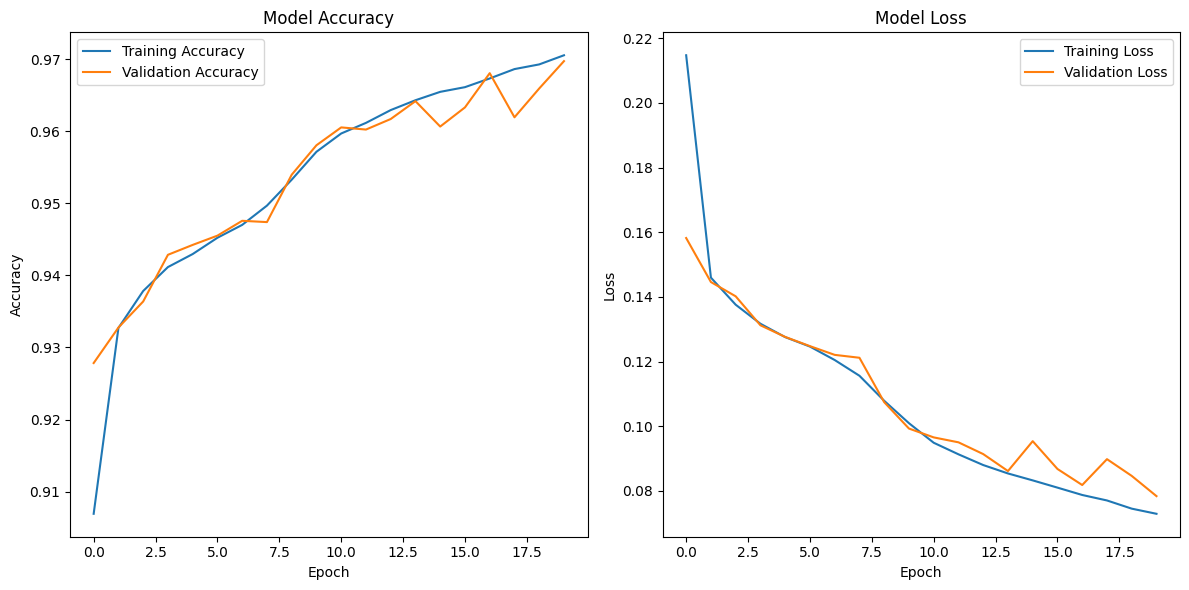

In [ ]:
import matplotlib.pyplot as plt

# Create a figure with subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

# Plot accuracy
axes[0].plot(history.history['accuracy'], label='Training Accuracy')
axes[0].plot(history.history['val_accuracy'], label='Validation Accuracy')
axes[0].set_title('Model Accuracy')
axes[0].set_xlabel('Epoch')
axes[0].set_ylabel('Accuracy')
axes[0].legend()

# Plot loss
axes[1].plot(history.history['loss'], label='Training Loss')
axes[1].plot(history.history['val_loss'], label='Validation Loss')
axes[1].set_title('Model Loss')
axes[1].set_xlabel('Epoch')
axes[1].set_ylabel('Loss')
axes[1].legend()

plt.tight_layout()
plt.show()


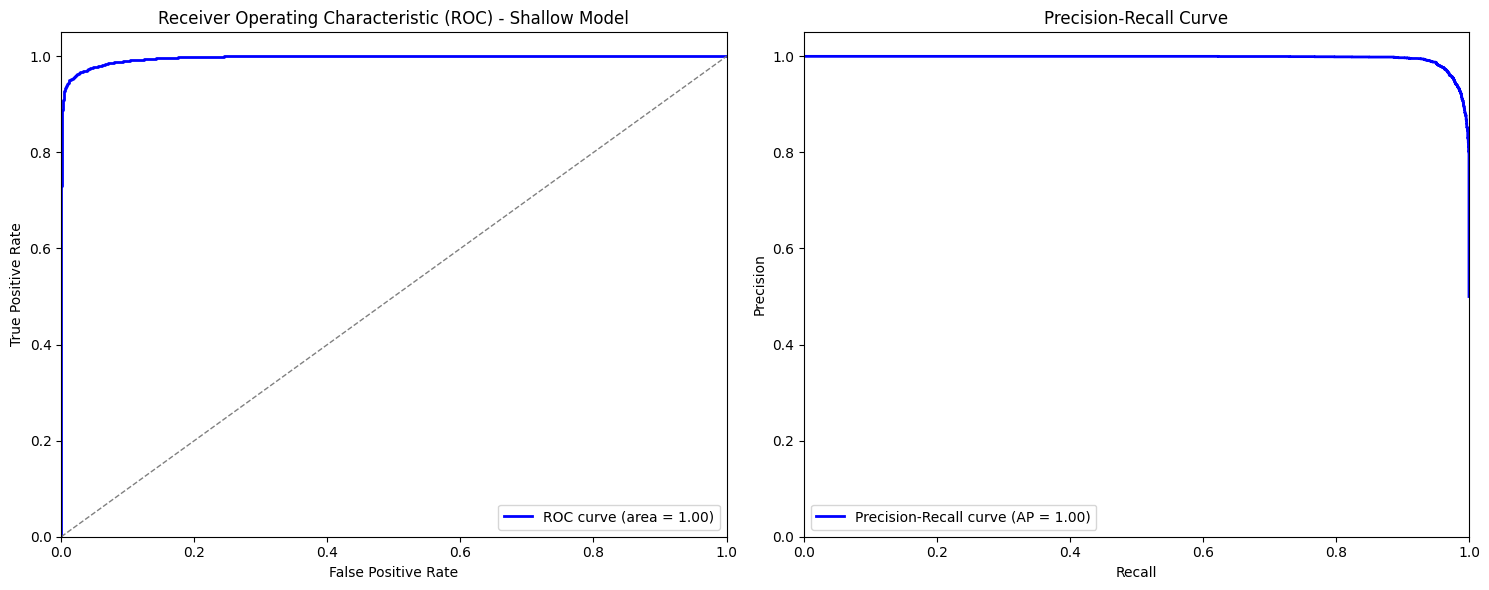

In [ ]:
from sklearn.metrics import roc_curve, auc, precision_recall_curve, average_precision_score
import matplotlib.pyplot as plt

# Calculate ROC curve
fpr, tpr, thresholds_roc = roc_curve(y_test, y_pred_val)
roc_auc = auc(fpr, tpr)

# Calculate Precision-Recall curve
precision, recall, thresholds_pr = precision_recall_curve(y_test, y_pred_val)
average_precision = average_precision_score(y_test, y_pred_val)

# Plot ROC curve and Precision-Recall curve as subplots
plt.figure(figsize=(15, 6))

# Plot ROC curve
plt.subplot(1, 2, 1)
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) - Shallow Model')
plt.legend(loc="lower right")

# Plot Precision-Recall curve
plt.subplot(1, 2, 2)
plt.plot(recall, precision, color='blue', lw=2, label='Precision-Recall curve (AP = %0.2f)' % average_precision)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc="lower left")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])

plt.tight_layout()
plt.show()


In [ ]:
#Append the metrics to an array
performance_metrics.append(metrics)

# Convert performance_metrics array to DataFrame
df_performance_data = pd.DataFrame(performance_metrics)

# Display the DataFrame
print(df_performance_data)
df_performance_data.to_csv(f_performance_path, index=False)
print(f_performance_path, "Saved")

           Time              Model  Training Time  Testing Time  Memory Usage  \
0  1.713015e+09  shallow_model_ANN     216.483879      0.506412          17.7   
1  1.713016e+09     deep_model_ANN     308.817342      0.826836          18.6   

   CPU Usage  Test Loss  Test Accuracy  Validation Accuracy  Precision  \
0       23.3   0.117342       0.950968             0.950968   0.960070   
1       55.3   0.075834       0.968602             0.968602   0.972463   

     Recall  F1 Score  ROC-AUC Score  Average Precision Score  \
0  0.941075  0.950478       0.991404                 0.991987   
1  0.964516  0.968473       0.996361                 0.996550   

             Confusion Matrix  
0  [[4468, 182], [274, 4376]]  
1  [[4523, 127], [165, 4485]]  
/content/drive/MyDrive/ANN_Edge/unsw_data/final4/models15000/cp2_data_performance.csv Saved


## Hyperparameter Tuning

In [ ]:
!pip install keras-tuner

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 3.7 MB/s eta 0:00:00


In [ ]:
from kerastuner.tuners import RandomSearch, Hyperband


<ipython-input-54-e64760501d7e>:1: DeprecationWarning: `import kerastuner` is deprecated, please use `import keras_tuner`.
  from kerastuner.tuners import RandomSearch, Hyperband


## Hyperparameter tuning - shallow model

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import LearningRateScheduler
from tensorflow.keras.regularizers import l1, l2  # Import l1 and l2 functions

from kerastuner import RandomSearch
from kerastuner import HyperParameters

modelname="shallow_model"
hpt_method="random search"


# Define a learning rate scheduler function
def lr_scheduler(epoch, lr):
    if epoch < 10:
        return lr
    else:
        return lr * tf.math.exp(-0.1)

def build_shallow_ann_model(hp):
    model = Sequential()

    # Input layer
    model.add(Dense(units=512,
                    input_dim=len(features1),
                    activation=hp['activation_layer1'],
                    kernel_initializer=hp['weight_initializer'],
                    kernel_regularizer=l1(hp['regularization_strength']) if hp['regularization_type'] == 'l1' else
                                     l2(hp['regularization_strength']) if hp['regularization_type'] == 'l2' else None))

    # Dropout layer (optional)
    if hp['use_dropout']:
        model.add(Dropout(rate=hp['dropout_rate']))

    # Output layer
    model.add(Dense(1, activation='sigmoid'))

    # Define the learning rate scheduler
    lr_schedule = LearningRateScheduler(lr_scheduler)

    # Choose the optimizer based on the hyperparameter value
    optimizer = None
    if hp['optimizer'] == 'adam':
        optimizer = tf.keras.optimizers.Adam(learning_rate=hp['learning_rate'])
    elif hp['optimizer'] == 'rmsprop':
        optimizer = tf.keras.optimizers.RMSprop(learning_rate=hp['learning_rate'])
    elif hp['optimizer'] == 'sgd':
        optimizer = tf.keras.optimizers.SGD(learning_rate=hp['learning_rate'], momentum=0.9)

    model.compile(optimizer=optimizer,
                  loss='binary_crossentropy',
                  metrics=['accuracy'])

    return model



# Create a HyperParameters object
hp = HyperParameters()

# Add hyperparameters to the object
hp.Choice('activation_layer1', ['relu', 'tanh', 'leaky_relu'])
hp.Choice('optimizer', ['adam', 'rmsprop', 'sgd'])  # Hyperparameter for choosing the optimizer
hp.Choice('learning_rate', [0.01, 0.001, 0.0001])
hp.Choice('weight_initializer', ['random_normal', 'glorot_uniform', 'he_normal'])
hp.Choice('batch_size', [8, 16, 32, 64, 128, 256])
hp.Choice('regularization_type', ['','l1', 'l2'])
hp.Choice('regularization_strength', [0.0, 0.001, 0.01, 0.1])
hp.Choice('use_lr_scheduler', [True, False])  # Hyperparameter for choosing whether to use the learning rate scheduler
hp.Choice('use_dropout', [True, False])  # Hyperparameter for choosing whether to use dropout
hp.Float('dropout_rate', 0.0, 0.5, step=0.1)  # Dropout rate hyperparameter


0.0

In [ ]:
# Instantiate the RandomSearch tuner with the HyperParameters object
tuner = RandomSearch(
    build_shallow_ann_model,
    objective='val_accuracy',
    max_trials=50,
    executions_per_trial=1,
    directory='my_dir',
    project_name='shallow_ann_hp_tuning_RS',
    hyperparameters=hp,  # Use the HyperParameters object
    overwrite=False  # Set to True if you want to overwrite existing results
)

# Record start time
start_time = time.time()

# Perform hyperparameter tuning
tuner.search(X_train, y_train,
             epochs=10,
             validation_split=0.2)

# Record end time
end_time = time.time()
elapsed_time = end_time - start_time

# Get the best hyperparameters
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]

# Build the model with the best hyperparameters and train it
best_model = tuner.hypermodel.build(best_hps)
history = best_model.fit(X_train, y_train, epochs=200, validation_split=0.2)

cpu_usage, memory_usage=get_system_info()


# Evaluate the best model on the test set
print("Best Hyperparameters:")
print(best_hps.values)


# Evaluate the best model on the test set
test_metrics = best_model.evaluate(X_test, y_test)

# Additional classification metrics
y_pred = best_model.predict(X_test)
y_pred_classes = np.round(y_pred)

precision = precision_score(y_test, np.round(y_pred))
recall = recall_score(y_test, np.round(y_pred))
f1 = f1_score(y_test, np.round(y_pred))
roc_auc = roc_auc_score(y_test, y_pred)
avg_precision = average_precision_score(y_test, y_pred)

confusion_matrix = tf.math.confusion_matrix(y_test, y_pred_classes).numpy()

# Display metrics
print("Test Metrics:")
print(" - Loss:", test_metrics[0])
print(" - Accuracy:", test_metrics[1])
print(" - elapsed_time", elapsed_time)
print("- memory_usage", memory_usage)
print(" - Other Metrics:")
print("   - Precision:", precision)
print("   - Recall:", recall)
print("   - F1 Score:", f1)
print("   - ROC-AUC:", roc_auc)
print("   - Precision Score", avg_precision)
print("   - Confusion Matrix:")
print(confusion_matrix)


# Save experiment details in hp_array
experiment_details = {
    'model': modelname,
    'hpt_method':hpt_method,
    'best_hyperparameters': best_hps.values,
    'elapsed_time': elapsed_time,
    'memory_usage': memory_usage,
    'cpu_usage': cpu_usage,
    'precision': precision,
    'recall': recall,
    'f1_score': f1,
    'roc_auc': roc_auc,
    'confusion_matrix': confusion_matrix.tolist(),
}
print(experiment_details)
hp_array.append(experiment_details)


Trial 50 Complete [00h 01m 57s]
val_accuracy: 0.8927419185638428

Best val_accuracy So Far: 0.9644862413406372
Total elapsed time: 01h 47m 43s
Epoch 1/200
4185/4185 [==============================] - 11s 2ms/step - loss: 0.1871 - accuracy: 0.9123 - val_loss: 0.1726 - val_accuracy: 0.9236
Epoch 2/200
4185/4185 [==============================] - 10s 3ms/step - loss: 0.1530 - accuracy: 0.9299 - val_loss: 0.1530 - val_accuracy: 0.9283
Epoch 3/200
4185/4185 [==============================] - 10s 2ms/step - loss: 0.1444 - accuracy: 0.9344 - val_loss: 0.1469 - val_accuracy: 0.9342
Epoch 4/200
4185/4185 [==============================] - 10s 2ms/step - loss: 0.1392 - accuracy: 0.9375 - val_loss: 0.1352 - val_accuracy: 0.9416
Epoch 5/200
4185/4185 [==============================] - 10s 2ms/step - loss: 0.1326 - accuracy: 0.9415 - val_loss: 0.1284 - val_accuracy: 0.9444
Epoch 6/200
4185/4185 [==============================] - 10s 2ms/step - loss: 0.1247 - accuracy: 0.9452 - val_loss: 0.1246 - va

In [ ]:
max_val_acc_epoch = np.argmax(history.history['val_accuracy'])
max_val_acc = history.history['val_accuracy'][max_val_acc_epoch]
min_val_loss_epoch = np.argmin(history.history['val_loss'])
min_val_loss = history.history['val_loss'][min_val_loss_epoch]

print("Epoch with maximum validation accuracy:", max_val_acc_epoch)
print("Maximum validation accuracy:", max_val_acc)
print("Epoch with minimum validation loss:", min_val_loss_epoch)
print("Minimum validation loss:", min_val_loss)

Epoch with maximum validation accuracy: 190
Maximum validation accuracy: 0.9799283146858215
Epoch with minimum validation loss: 87
Minimum validation loss: 0.06186360865831375


In [ ]:
# Build the model with the best hyperparameters and train it
best_model = tuner.hypermodel.build(best_hps)
history = best_model.fit(X_train, y_train, epochs=250, validation_split=0.2)

cpu_usage, memory_usage=get_system_info()


# Evaluate the best model on the test set
print("Best Hyperparameters:")
print(best_hps.values)


# Evaluate the best model on the test set
test_metrics = best_model.evaluate(X_test, y_test)

# Additional classification metrics
y_pred = best_model.predict(X_test)
y_pred_classes = np.round(y_pred)

precision = precision_score(y_test, np.round(y_pred))
recall = recall_score(y_test, np.round(y_pred))
f1 = f1_score(y_test, np.round(y_pred))
roc_auc = roc_auc_score(y_test, y_pred)
avg_precision = average_precision_score(y_test, y_pred)

confusion_matrix = tf.math.confusion_matrix(y_test, y_pred_classes).numpy()

# Display metrics
print("Test Metrics:")
print(" - Loss:", test_metrics[0])
print(" - Accuracy:", test_metrics[1])
print(" - elapsed_time", elapsed_time)
print("- memory_usage", memory_usage)
print(" - Other Metrics:")
print("   - Precision:", precision)
print("   - Recall:", recall)
print("   - F1 Score:", f1)
print("   - ROC-AUC:", roc_auc)
print("   - Precision Score", avg_precision)
print("   - Confusion Matrix:")
print(confusion_matrix)


# Save experiment details in hp_array
experiment_details = {
    'model': modelname,
    'hpt_method':hpt_method,
    'best_hyperparameters': best_hps.values,
    'elapsed_time': elapsed_time,
    'memory_usage': memory_usage,
    'cpu_usage': cpu_usage,
    'precision': precision,
    'recall': recall,
    'f1_score': f1,
    'roc_auc': roc_auc,
    'confusion_matrix': confusion_matrix.tolist(),
}
print(experiment_details)
hp_array.append(experiment_details)


Epoch 1/250
4185/4185 [==============================] - 24s 5ms/step - loss: 0.1869 - accuracy: 0.9121 - val_loss: 0.1603 - val_accuracy: 0.9256
Epoch 2/250
4185/4185 [==============================] - 15s 4ms/step - loss: 0.1526 - accuracy: 0.9300 - val_loss: 0.1536 - val_accuracy: 0.9305
Epoch 3/250
4185/4185 [==============================] - 11s 3ms/step - loss: 0.1438 - accuracy: 0.9355 - val_loss: 0.1499 - val_accuracy: 0.9330
Epoch 4/250
4185/4185 [==============================] - 10s 2ms/step - loss: 0.1384 - accuracy: 0.9381 - val_loss: 0.1415 - val_accuracy: 0.9342
Epoch 5/250
4185/4185 [==============================] - 10s 2ms/step - loss: 0.1341 - accuracy: 0.9395 - val_loss: 0.1463 - val_accuracy: 0.9373
Epoch 6/250
4185/4185 [==============================] - 9s 2ms/step - loss: 0.1284 - accuracy: 0.9433 - val_loss: 0.1266 - val_accuracy: 0.9464
Epoch 7/250
4185/4185 [==============================] - 10s 2ms/step - loss: 0.1214 - accuracy: 0.9471 - val_loss: 0.1215 - 

In [ ]:
max_val_acc_epoch = np.argmax(history.history['val_accuracy'])
max_val_acc = history.history['val_accuracy'][max_val_acc_epoch]
min_val_loss_epoch = np.argmin(history.history['val_loss'])
min_val_loss = history.history['val_loss'][min_val_loss_epoch]

print("Epoch with maximum validation accuracy:", max_val_acc_epoch)
print("Maximum validation accuracy:", max_val_acc)
print("Epoch with minimum validation loss:", min_val_loss_epoch)
print("Minimum validation loss:", min_val_loss)

Epoch with maximum validation accuracy: 244
Maximum validation accuracy: 0.9800776839256287
Epoch with minimum validation loss: 107
Minimum validation loss: 0.06190900877118111


In [ ]:
# Build the model with the best hyperparameters and train it
best_model = tuner.hypermodel.build(best_hps)
history = best_model.fit(X_train, y_train, epochs=300, validation_split=0.2)

cpu_usage, memory_usage=get_system_info()


# Evaluate the best model on the test set
print("Best Hyperparameters:")
print(best_hps.values)


# Evaluate the best model on the test set
test_metrics = best_model.evaluate(X_test, y_test)

# Additional classification metrics
y_pred = best_model.predict(X_test)
y_pred_classes = np.round(y_pred)

precision = precision_score(y_test, np.round(y_pred))
recall = recall_score(y_test, np.round(y_pred))
f1 = f1_score(y_test, np.round(y_pred))
roc_auc = roc_auc_score(y_test, y_pred)
avg_precision = average_precision_score(y_test, y_pred)

confusion_matrix = tf.math.confusion_matrix(y_test, y_pred_classes).numpy()

# Display metrics
print("Test Metrics:")
print(" - Loss:", test_metrics[0])
print(" - Accuracy:", test_metrics[1])
print(" - elapsed_time", elapsed_time)
print("- memory_usage", memory_usage)
print(" - Other Metrics:")
print("   - Precision:", precision)
print("   - Recall:", recall)
print("   - F1 Score:", f1)
print("   - ROC-AUC:", roc_auc)
print("   - Precision Score", avg_precision)
print("   - Confusion Matrix:")
print(confusion_matrix)


# Save experiment details in hp_array
experiment_details = {
    'model': modelname,
    'hpt_method':hpt_method,
    'best_hyperparameters': best_hps.values,
    'elapsed_time': elapsed_time,
    'memory_usage': memory_usage,
    'cpu_usage': cpu_usage,
    'precision': precision,
    'recall': recall,
    'f1_score': f1,
    'roc_auc': roc_auc,
    'confusion_matrix': confusion_matrix.tolist(),
}
print(experiment_details)
hp_array.append(experiment_details)


Epoch 1/300
4185/4185 [==============================] - 19s 4ms/step - loss: 0.1876 - accuracy: 0.9123 - val_loss: 0.1606 - val_accuracy: 0.9236
Epoch 2/300
4185/4185 [==============================] - 15s 4ms/step - loss: 0.1527 - accuracy: 0.9296 - val_loss: 0.1548 - val_accuracy: 0.9288
Epoch 3/300
4185/4185 [==============================] - 11s 3ms/step - loss: 0.1446 - accuracy: 0.9349 - val_loss: 0.1462 - val_accuracy: 0.9332
Epoch 4/300
4185/4185 [==============================] - 10s 2ms/step - loss: 0.1384 - accuracy: 0.9380 - val_loss: 0.1412 - val_accuracy: 0.9373
Epoch 5/300
4185/4185 [==============================] - 9s 2ms/step - loss: 0.1315 - accuracy: 0.9416 - val_loss: 0.1336 - val_accuracy: 0.9426
Epoch 6/300
4185/4185 [==============================] - 11s 3ms/step - loss: 0.1235 - accuracy: 0.9469 - val_loss: 0.1345 - val_accuracy: 0.9333
Epoch 7/300
4185/4185 [==============================] - 10s 2ms/step - loss: 0.1144 - accuracy: 0.9514 - val_loss: 0.1125 - 

In [ ]:
max_val_acc_epoch = np.argmax(history.history['val_accuracy'])
max_val_acc = history.history['val_accuracy'][max_val_acc_epoch]
min_val_loss_epoch = np.argmin(history.history['val_loss'])
min_val_loss = history.history['val_loss'][min_val_loss_epoch]

print("Epoch with maximum validation accuracy:", max_val_acc_epoch)
print("Maximum validation accuracy:", max_val_acc)
print("Epoch with minimum validation loss:", min_val_loss_epoch)
print("Minimum validation loss:", min_val_loss)

Epoch with maximum validation accuracy: 290
Maximum validation accuracy: 0.9810035824775696
Epoch with minimum validation loss: 110
Minimum validation loss: 0.06285181641578674


In [ ]:
# Build the model with the best hyperparameters and train it
best_model = tuner.hypermodel.build(best_hps)
history = best_model.fit(X_train, y_train, epochs=350, validation_split=0.2)

cpu_usage, memory_usage=get_system_info()


# Evaluate the best model on the test set
print("Best Hyperparameters:")
print(best_hps.values)


# Evaluate the best model on the test set
test_metrics = best_model.evaluate(X_test, y_test)

# Additional classification metrics
y_pred = best_model.predict(X_test)
y_pred_classes = np.round(y_pred)

precision = precision_score(y_test, np.round(y_pred))
recall = recall_score(y_test, np.round(y_pred))
f1 = f1_score(y_test, np.round(y_pred))
roc_auc = roc_auc_score(y_test, y_pred)
avg_precision = average_precision_score(y_test, y_pred)

confusion_matrix = tf.math.confusion_matrix(y_test, y_pred_classes).numpy()

# Display metrics
print("Test Metrics:")
print(" - Loss:", test_metrics[0])
print(" - Accuracy:", test_metrics[1])
print(" - elapsed_time", elapsed_time)
print("- memory_usage", memory_usage)
print(" - Other Metrics:")
print("   - Precision:", precision)
print("   - Recall:", recall)
print("   - F1 Score:", f1)
print("   - ROC-AUC:", roc_auc)
print("   - Precision Score", avg_precision)
print("   - Confusion Matrix:")
print(confusion_matrix)


# Save experiment details in hp_array
experiment_details = {
    'model': modelname,
    'hpt_method':hpt_method,
    'best_hyperparameters': best_hps.values,
    'elapsed_time': elapsed_time,
    'memory_usage': memory_usage,
    'cpu_usage': cpu_usage,
    'precision': precision,
    'recall': recall,
    'f1_score': f1,
    'roc_auc': roc_auc,
    'confusion_matrix': confusion_matrix.tolist(),
}
print(experiment_details)
hp_array.append(experiment_details)


Epoch 1/350
4185/4185 [==============================] - 17s 4ms/step - loss: 0.1888 - accuracy: 0.9117 - val_loss: 0.1617 - val_accuracy: 0.9300
Epoch 2/350
4185/4185 [==============================] - 13s 3ms/step - loss: 0.1516 - accuracy: 0.9307 - val_loss: 0.1494 - val_accuracy: 0.9328
Epoch 3/350
4185/4185 [==============================] - 10s 2ms/step - loss: 0.1434 - accuracy: 0.9351 - val_loss: 0.1421 - val_accuracy: 0.9357
Epoch 4/350
4185/4185 [==============================] - 10s 2ms/step - loss: 0.1388 - accuracy: 0.9376 - val_loss: 0.1442 - val_accuracy: 0.9312
Epoch 5/350
4185/4185 [==============================] - 11s 3ms/step - loss: 0.1346 - accuracy: 0.9396 - val_loss: 0.1391 - val_accuracy: 0.9368
Epoch 6/350
4185/4185 [==============================] - 10s 2ms/step - loss: 0.1307 - accuracy: 0.9421 - val_loss: 0.1346 - val_accuracy: 0.9401
Epoch 7/350
4185/4185 [==============================] - 10s 2ms/step - loss: 0.1252 - accuracy: 0.9446 - val_loss: 0.1221 -

In [ ]:
max_val_acc_epoch = np.argmax(history.history['val_accuracy'])
max_val_acc = history.history['val_accuracy'][max_val_acc_epoch]
min_val_loss_epoch = np.argmin(history.history['val_loss'])
min_val_loss = history.history['val_loss'][min_val_loss_epoch]

print("Epoch with maximum validation accuracy:", max_val_acc_epoch)
print("Maximum validation accuracy:", max_val_acc)
print("Epoch with minimum validation loss:", min_val_loss_epoch)
print("Minimum validation loss:", min_val_loss)

Epoch with maximum validation accuracy: 309
Maximum validation accuracy: 0.980555534362793
Epoch with minimum validation loss: 96
Minimum validation loss: 0.06331657618284225


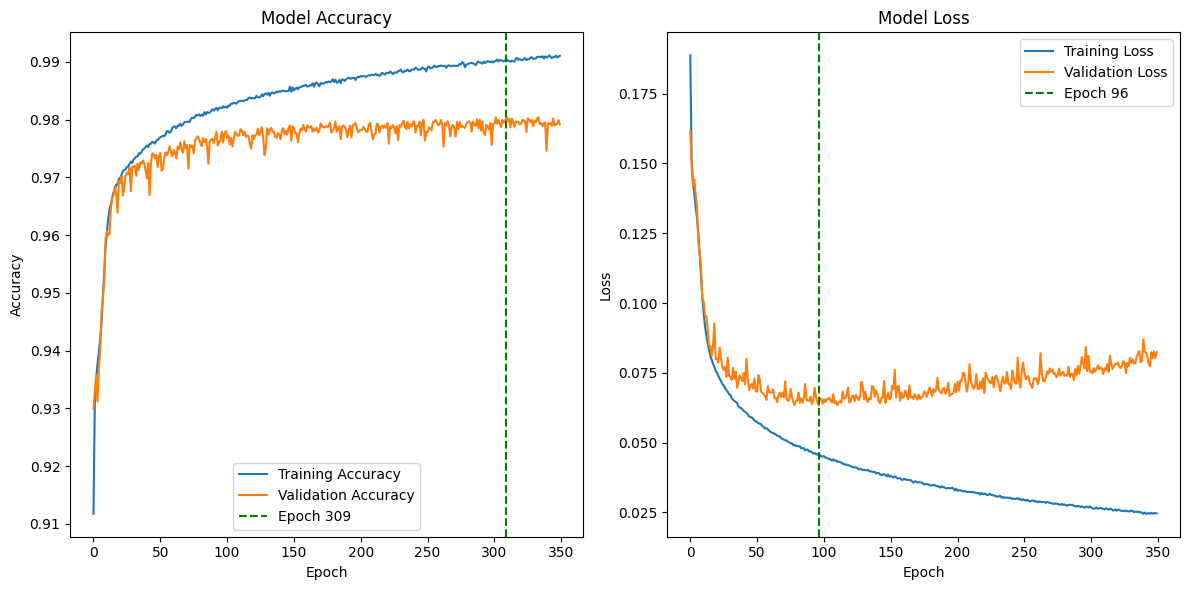

In [ ]:
import matplotlib.pyplot as plt

# Create a figure with subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

# Plot accuracy
axes[0].plot(history.history['accuracy'], label='Training Accuracy')
axes[0].plot(history.history['val_accuracy'], label='Validation Accuracy')
axes[0].axvline(x=309, color='g', linestyle='--', label='Epoch 309')  # Vertical line at epoch 60
axes[0].set_title('Model Accuracy')
axes[0].set_xlabel('Epoch')
axes[0].set_ylabel('Accuracy')
axes[0].legend()

# Plot loss
axes[1].plot(history.history['loss'], label='Training Loss')
axes[1].plot(history.history['val_loss'], label='Validation Loss')
axes[1].axvline(x=96, color='g', linestyle='--', label='Epoch 96')  # Vertical line at epoch 60
axes[1].set_title('Model Loss')
axes[1].set_xlabel('Epoch')
axes[1].set_ylabel('Loss')
axes[1].legend()

plt.tight_layout()
plt.show()


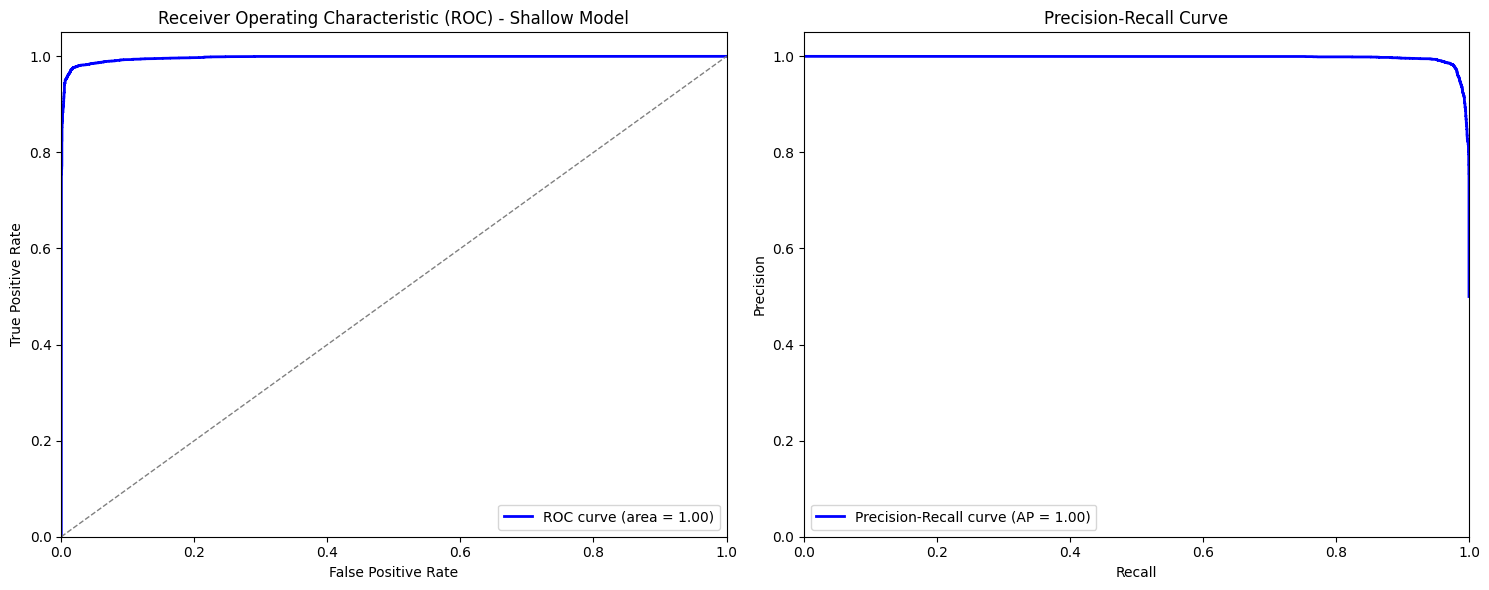

In [ ]:
from sklearn.metrics import roc_curve, auc, precision_recall_curve, average_precision_score
import matplotlib.pyplot as plt


# Calculate ROC curve
fpr, tpr, thresholds_roc = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

# Calculate Precision-Recall curve
precision, recall, thresholds_pr = precision_recall_curve(y_test, y_pred)
average_precision = average_precision_score(y_test, y_pred)

# Plot ROC curve and Precision-Recall curve as subplots
plt.figure(figsize=(15, 6))

# Plot ROC curve
plt.subplot(1, 2, 1)
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) - Shallow Model')
plt.legend(loc="lower right")

# Plot Precision-Recall curve
plt.subplot(1, 2, 2)
plt.plot(recall, precision, color='blue', lw=2, label='Precision-Recall curve (AP = %0.2f)' % average_precision)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc="lower left")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])

plt.tight_layout()
plt.show()


#Creating the final shallow model

In [ ]:
from keras.callbacks import ModelCheckpoint

# Define the filepath to save the model
checkpoint_filepath = shallow_model_path_best_hp

# Define a ModelCheckpoint callback to save the model with the highest validation accuracy
checkpoint = ModelCheckpoint(checkpoint_filepath,
                             monitor='val_accuracy',
                             save_best_only=True,
                             mode='max',
                             verbose=1)

# Build the model with the best hyperparameters
best_model = tuner.hypermodel.build(best_hps)

# Train the model with early stopping and ModelCheckpoint callback
history = best_model.fit(X_train, y_train,
                          epochs=100,
                          validation_split=0.2,
                          callbacks=[checkpoint])




Epoch 1/100
4182/4185 [============================>.] - ETA: 0s - loss: 0.1901 - accuracy: 0.9105
Epoch 1: val_accuracy improved from -inf to 0.92387, saving model to /content/drive/MyDrive/ANN_Edge/unsw_data/final4/models15000/shallow_model_ANN5_hp.keras
4185/4185 [==============================] - 14s 3ms/step - loss: 0.1902 - accuracy: 0.9105 - val_loss: 0.1622 - val_accuracy: 0.9239
Epoch 2/100
4169/4185 [============================>.] - ETA: 0s - loss: 0.1526 - accuracy: 0.9303
Epoch 2: val_accuracy improved from 0.92387 to 0.92787, saving model to /content/drive/MyDrive/ANN_Edge/unsw_data/final4/models15000/shallow_model_ANN5_hp.keras
4185/4185 [==============================] - 11s 3ms/step - loss: 0.1525 - accuracy: 0.9303 - val_loss: 0.1575 - val_accuracy: 0.9279
Epoch 3/100
4174/4185 [============================>.] - ETA: 0s - loss: 0.1444 - accuracy: 0.9347
Epoch 3: val_accuracy improved from 0.92787 to 0.93772, saving model to /content/drive/MyDrive/ANN_Edge/unsw_data/fi

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_14 (Dense)            (None, 512)               20992     
                                                                 
 dense_15 (Dense)            (None, 1)                 513       
                                                                 
Total params: 21505 (84.00 KB)
Trainable params: 21505 (84.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


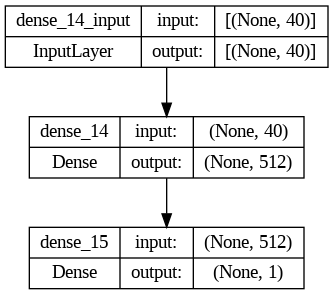

In [ ]:
from tensorflow.keras.utils import plot_model
from tensorflow.keras.models import load_model, Model

best_model =load_model(checkpoint_filepath)

# Display the summary of the loaded model
best_model.summary()

# Plot the architecture of the loaded model
plot_model(best_model, to_file='shallow_model_best_plot.png', show_shapes=True, show_layer_names=True)

## ANN Shallow Model Testing

In [ ]:
import psutil
import time
from keras.models import load_model
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, average_precision_score
import tensorflow as tf

# Load the saved model
saved_model = load_model(checkpoint_filepath)

# Measure CPU and memory usage before prediction
cpu_usage_before = psutil.cpu_percent()
memory_usage_before = psutil.virtual_memory().used

# Record start time for prediction
start_time = time.time()

# Assuming X_test and y_test are your test data
# Predict on the test data
y_pred = saved_model.predict(X_test)

# Convert predicted probabilities to binary predictions (0 or 1)
y_pred_classes = (y_pred > 0.5).astype(int)

# Record end time for prediction
end_time = time.time()

# Measure CPU and memory usage after prediction
cpu_usage_after = psutil.cpu_percent()
memory_usage_after = psutil.virtual_memory().used

# Calculate prediction time
prediction_time = end_time - start_time

# Calculate performance metrics
accuracy = accuracy_score(y_test, y_pred_classes)
precision = precision_score(y_test, y_pred_classes)
recall = recall_score(y_test, y_pred_classes)
f1 = f1_score(y_test, y_pred_classes)
roc_auc = roc_auc_score(y_test, y_pred)
avg_precision = average_precision_score(y_test, y_pred)

# Compute confusion matrix
confusion_matrix = tf.math.confusion_matrix(y_test, y_pred_classes).numpy()

# Print performance metrics
print("Test Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("ROC AUC Score:", roc_auc)
print("Average Precision:", avg_precision)
print("Confusion Matrix:\n", confusion_matrix)

# Print CPU and memory usage, and prediction time
print("CPU usage before prediction:", cpu_usage_before)
print("Memory usage before prediction:", memory_usage_before)
print("CPU usage after prediction:", cpu_usage_after)
print("Memory usage after prediction:", memory_usage_after)
print("Prediction time:", prediction_time)


291/291 [==============================] - 1s 2ms/step
Test Accuracy: 0.9763440860215054
Precision: 0.9823606271777003
Recall: 0.9701075268817204
F1 Score: 0.976195628651807
ROC AUC Score: 0.9974461325008673
Average Precision: 0.9975551055069009
Confusion Matrix:
 [[4569   81]
 [ 139 4511]]
CPU usage before prediction: 50.3
Memory usage before prediction: 2493329408
CPU usage after prediction: 99.4
Memory usage after prediction: 2493325312
Prediction time: 0.8256137371063232


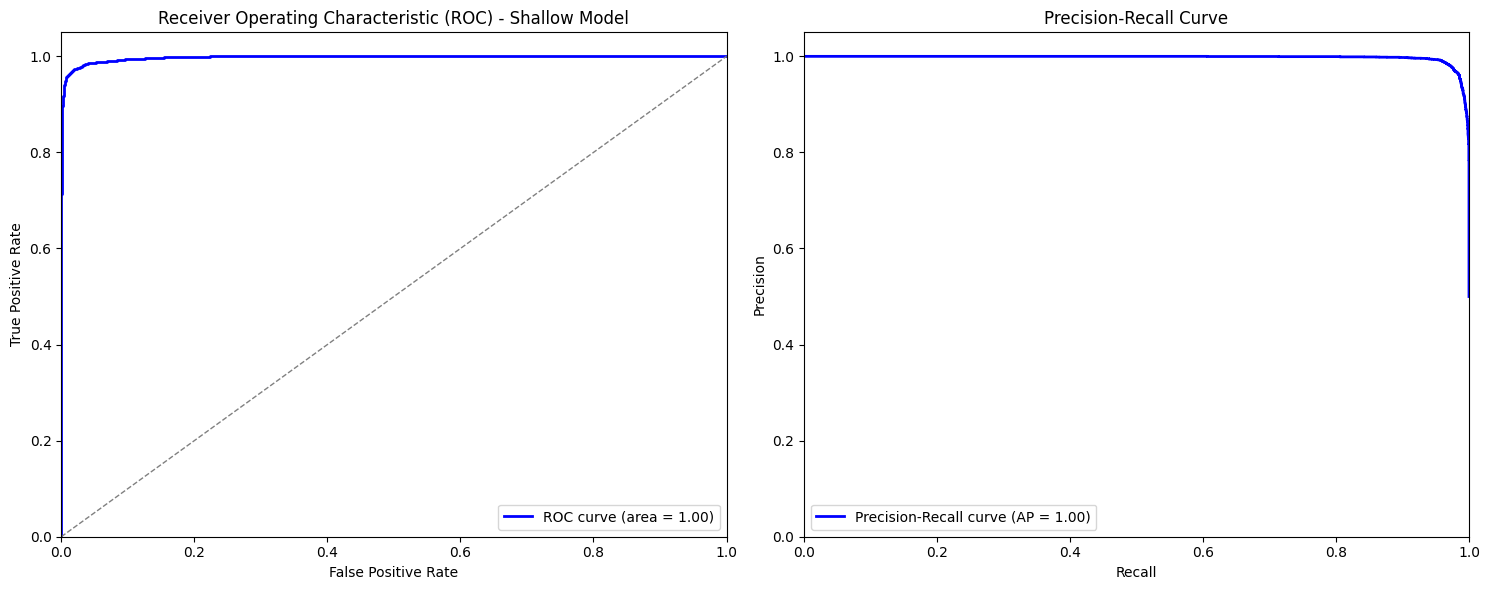

In [ ]:
from sklearn.metrics import roc_curve, auc, precision_recall_curve, average_precision_score
import matplotlib.pyplot as plt

# Calculate ROC curve
fpr, tpr, thresholds_roc = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

# Calculate Precision-Recall curve
precision, recall, thresholds_pr = precision_recall_curve(y_test, y_pred)
average_precision = average_precision_score(y_test, y_pred)

# Plot ROC curve and Precision-Recall curve as subplots
plt.figure(figsize=(15, 6))

# Plot ROC curve
plt.subplot(1, 2, 1)
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) - Shallow Model')
plt.legend(loc="lower right")

# Plot Precision-Recall curve
plt.subplot(1, 2, 2)
plt.plot(recall, precision, color='blue', lw=2, label='Precision-Recall curve (AP = %0.2f)' % average_precision)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc="lower left")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])

plt.tight_layout()
plt.show()


## ANN Shallow Model Validation

In [ ]:
import psutil
import time
import numpy as np
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, average_precision_score
import tensorflow as tf
from keras.models import load_model

# Load the best model saved by ModelCheckpoint
best_model = load_model(checkpoint_filepath)

# Measure CPU and memory usage before validation
cpu_usage_before = psutil.cpu_percent()
memory_usage_before = psutil.virtual_memory().used

# Record start time for validation
start_time = time.time()

# Validate the loaded best model using validation data
evaluation = best_model.evaluate(X_val, y_val)

# Record end time for validation
end_time = time.time()

# Measure CPU and memory usage after validation
cpu_usage_after = psutil.cpu_percent()
memory_usage_after = psutil.virtual_memory().used

# Calculate validation time
validation_time = end_time - start_time

# Print the evaluation metrics
print("Validation Loss:", evaluation[0])
print("Validation Accuracy:", evaluation[1])

# Assuming y_pred is the predicted probabilities and y_pred_classes are the predicted classes
y_pred = best_model.predict(X_val)
y_pred_classes = np.round(y_pred)

# Compute additional performance metrics
precision = precision_score(y_val, y_pred_classes)
recall = recall_score(y_val, y_pred_classes)
f1 = f1_score(y_val, y_pred_classes)
roc_auc = roc_auc_score(y_val, y_pred)
avg_precision = average_precision_score(y_val, y_pred)

# Compute confusion matrix
confusion_matrix = tf.math.confusion_matrix(y_val, y_pred_classes).numpy()

# Print additional performance metrics
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("ROC AUC Score:", roc_auc)
print("Average Precision:", avg_precision)
print("Confusion Matrix:\n", confusion_matrix)

# Print CPU and memory usage, and validation time
print("CPU usage before validation:", cpu_usage_before)
print("Memory usage before validation:", memory_usage_before)
print("CPU usage after validation:", cpu_usage_after)
print("Memory usage after validation:", memory_usage_after)
print("Validation time:", validation_time)


291/291 [==============================] - 1s 2ms/step - loss: 0.0683 - accuracy: 0.9755
Validation Loss: 0.0682736337184906
Validation Accuracy: 0.9754838943481445
291/291 [==============================] - 0s 1ms/step
Precision: 0.9835958005249343
Recall: 0.9670967741935483
F1 Score: 0.9752765126870527
ROC AUC Score: 0.997155416811192
Average Precision: 0.9972994326147935
Confusion Matrix:
 [[4575   75]
 [ 153 4497]]
CPU usage before validation: 17.9
Memory usage before validation: 2490318848
CPU usage after validation: 62.3
Memory usage after validation: 2490318848
Validation time: 0.7030797004699707


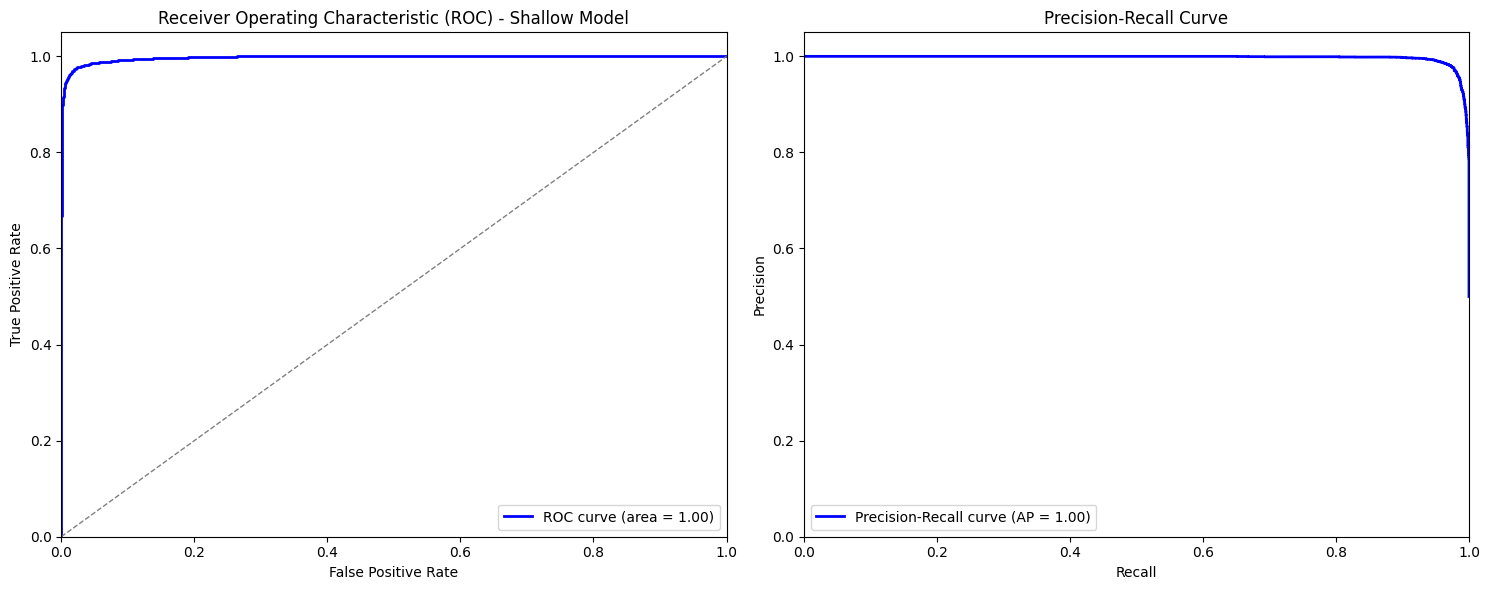

In [ ]:
from sklearn.metrics import roc_curve, auc, precision_recall_curve, average_precision_score
import matplotlib.pyplot as plt

# Calculate ROC curve
fpr, tpr, thresholds_roc = roc_curve(y_val, y_pred)
roc_auc = auc(fpr, tpr)

# Calculate Precision-Recall curve
precision, recall, thresholds_pr = precision_recall_curve(y_val, y_pred)
average_precision = average_precision_score(y_val, y_pred)

# Plot ROC curve and Precision-Recall curve as subplots
plt.figure(figsize=(15, 6))

# Plot ROC curve
plt.subplot(1, 2, 1)
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) - Shallow Model')
plt.legend(loc="lower right")

# Plot Precision-Recall curve
plt.subplot(1, 2, 2)
plt.plot(recall, precision, color='blue', lw=2, label='Precision-Recall curve (AP = %0.2f)' % average_precision)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc="lower left")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])

plt.tight_layout()
plt.show()


## Deep model Hyperparameter Tuning

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import LearningRateScheduler
from tensorflow.keras.regularizers import l1, l2  # Import l1 and l2 functions
from kerastuner import RandomSearch
from kerastuner import HyperParameters
import numpy as np
import time
import psutil
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, average_precision_score

modelname = "deep_ann_model"
hpt_method = "random search"

# Define a learning rate scheduler function
def lr_scheduler(epoch, lr):
    if epoch < 10:
        return lr
    else:
        return lr * tf.math.exp(-0.1)

# Update the model building function to include the new hyperparameters and configurations
def build_deep_ann_model(hp):
    model = Sequential()
    lu = hp['units']  # layer units
    # Input layer
    model.add(Dense(units=lu,
                    input_dim=len(features1),
                    activation=hp['activation_layer1'],
                    kernel_initializer=hp['weight_initializer'],
                    kernel_regularizer=l1(hp['regularization_strength']) if hp['regularization_type'] == 'l1' else
                    l2(hp['regularization_strength']) if hp['regularization_type'] == 'l2' else None))

    # Hidden layers
    for i in range(1, 7):
        lu = lu / 2
        model.add(Dense(units=lu,
                        activation=hp[f'activation_layer{i + 1}'],
                        kernel_initializer=hp['weight_initializer'],
                        kernel_regularizer=l1(hp['regularization_strength']) if hp['regularization_type'] == 'l1' else
                        l2(hp['regularization_strength']) if hp['regularization_type'] == 'l2' else None))

        # Dropout layer (optional)
        if hp['use_dropout']:
            model.add(Dropout(rate=hp['dropout_rate']))

    # Output layer
    model.add(Dense(1, activation='sigmoid'))

    # Define the learning rate scheduler
    lr_schedule = LearningRateScheduler(lr_scheduler)

    # Choose the optimizer based on the hyperparameter value
    optimizer = None
    if hp['optimizer'] == 'adam':
        optimizer = tf.keras.optimizers.Adam(learning_rate=hp['learning_rate'])
    elif hp['optimizer'] == 'rmsprop':
        optimizer = tf.keras.optimizers.RMSprop(learning_rate=hp['learning_rate'])
    elif hp['optimizer'] == 'sgd':
        optimizer = tf.keras.optimizers.SGD(learning_rate=hp['learning_rate'], momentum=0.9)

    model.compile(optimizer=optimizer,
                  loss='binary_crossentropy',
                  metrics=['accuracy'])

    return model

# Create a HyperParameters object
hp = HyperParameters()
hp.Choice('units', [256])
# Add hyperparameters to the object
hp.Choice('activation_layer1', ['relu', 'tanh', 'leaky_relu'])
hp.Choice('activation_layer2', ['relu', 'tanh', 'leaky_relu'])
hp.Choice('activation_layer3', ['relu', 'tanh', 'leaky_relu'])
hp.Choice('activation_layer4', ['relu', 'tanh', 'leaky_relu'])
hp.Choice('activation_layer5', ['relu', 'tanh', 'leaky_relu'])
hp.Choice('activation_layer6', ['relu', 'tanh', 'leaky_relu'])
hp.Choice('activation_layer7', ['relu', 'tanh', 'leaky_relu'])
hp.Choice('optimizer', ['adam', 'rmsprop', 'sgd'])  # Hyperparameter for choosing the optimizer
hp.Choice('learning_rate', [0.01, 0.001, 0.0001])
hp.Choice('weight_initializer', ['random_normal', 'glorot_uniform', 'he_normal'])
hp.Choice('batch_size', [8, 16, 32, 64, 128, 256])
hp.Choice('regularization_type', ['','l1', 'l2'])
hp.Choice('regularization_strength', [0.0, 0.001, 0.01, 0.1])
hp.Choice('use_lr_scheduler', [True, False])  # Hyperparameter for choosing whether to use the learning rate scheduler
hp.Choice('use_dropout', [True, False])  # Hyperparameter for choosing whether to use dropout
hp.Float('dropout_rate', 0.0, 0.5, step=0.1)  # Dropout rate hyperparameter

0.0

In [ ]:
# Instantiate the RandomSearch tuner with the HyperParameters object
tuner = RandomSearch(
    build_deep_ann_model,
    objective='val_accuracy',
    max_trials=50,
    executions_per_trial=1,
    directory='my_dir',
    project_name='deep_ann_hy_tuning_RS4',
    hyperparameters=hp,  # Use the HyperParameters object
    overwrite=True  # Set to True if you want to overwrite existing results
)

# Record start time
start_time = time.time()

# Perform hyperparameter tuning
tuner.search(X_train, y_train,
             epochs=10,
             validation_split=0.2)

# Record end time
end_time = time.time()
elapsed_time = end_time - start_time

# Get the best hyperparameters
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]

# Build the model with the best hyperparameters and train it
best_model = tuner.hypermodel.build(best_hps)
# Evaluate the best model on the test set
print("Best Hyperparameters:")
print(best_hps.values)


Trial 50 Complete [00h 03m 24s]
val_accuracy: 0.5028674006462097

Best val_accuracy So Far: 0.9708781242370605
Total elapsed time: 02h 11m 32s
Best Hyperparameters:
{'units': 256, 'activation_layer1': 'relu', 'activation_layer2': 'relu', 'activation_layer3': 'leaky_relu', 'activation_layer4': 'relu', 'activation_layer5': 'relu', 'activation_layer6': 'relu', 'activation_layer7': 'leaky_relu', 'optimizer': 'adam', 'learning_rate': 0.001, 'weight_initializer': 'glorot_uniform', 'batch_size': 16, 'regularization_type': 'l2', 'regularization_strength': 0.0, 'use_lr_scheduler': 0, 'use_dropout': 0, 'dropout_rate': 0.4}


### Building model with{'units': 256, 'activation_layer1': 'relu', 'activation_layer2': 'relu', 'activation_layer3': 'leaky_relu', 'activation_layer4': 'relu', 'activation_layer5': 'relu', 'activation_layer6': 'relu', 'activation_layer7': 'leaky_relu', 'optimizer': 'adam', 'learning_rate': 0.001, 'weight_initializer': 'glorot_uniform', 'batch_size': 16, 'regularization_type': 'l2', 'regularization_strength': 0.0, 'use_lr_scheduler': 0, 'use_dropout': 0, 'dropout_rate': 0.4}

In [ ]:
history = best_model.fit(X_train, y_train, epochs=350, validation_split=0.2)

# Record additional metrics
memory_usage = psutil.virtual_memory().used
cpu_usage = psutil.cpu_percent()

# Evaluate the best model on the test set
test_metrics = best_model.evaluate(X_test, y_test)

# Additional classification metrics
y_pred = best_model.predict(X_test)
y_pred_classes = np.round(y_pred)

precision = precision_score(y_test, np.round(y_pred))
recall = recall_score(y_test, np.round(y_pred))
f1 = f1_score(y_test, np.round(y_pred))
roc_auc = roc_auc_score(y_test, y_pred)
avg_precision = average_precision_score(y_test, y_pred)

confusion_matrix = tf.math.confusion_matrix(y_test, y_pred_classes).numpy()

# Display metrics
print("Test Metrics:")
print(" - Loss:", test_metrics[0])
print(" - Accuracy:", test_metrics[1])
print(" - Other Metrics:")
print("   - Precision:", precision)
print("   - Recall:", recall)
print("   - F1 Score:", f1)
print("   - ROC-AUC:", roc_auc)
print("   - Precision Score", avg_precision)
print("   - Confusion Matrix:")
print(confusion_matrix)



# Save experiment details in hp_array
experiment_details = {
    'model': modelname,
    'hpt_method':hpt_method,
    'best_hyperparameters': best_hps.values,
    'elapsed_time': elapsed_time,
    'memory_usage': memory_usage,
    'cpu_usage': cpu_usage,
    'precision': precision,
    'recall': recall,
    'f1_score': f1,
    'roc_auc': roc_auc,
    'confusion_matrix': confusion_matrix.tolist(),
}
print(experiment_details)
hp_array.append(experiment_details)

Epoch 1/350
4185/4185 [==============================] - 15s 3ms/step - loss: 0.1680 - accuracy: 0.9218 - val_loss: 0.1392 - val_accuracy: 0.9388
Epoch 2/350
4185/4185 [==============================] - 14s 3ms/step - loss: 0.1256 - accuracy: 0.9456 - val_loss: 0.1076 - val_accuracy: 0.9555
Epoch 3/350
4185/4185 [==============================] - 15s 4ms/step - loss: 0.1003 - accuracy: 0.9585 - val_loss: 0.0977 - val_accuracy: 0.9598
Epoch 4/350
4185/4185 [==============================] - 15s 4ms/step - loss: 0.0905 - accuracy: 0.9622 - val_loss: 0.0866 - val_accuracy: 0.9642
Epoch 5/350
4185/4185 [==============================] - 14s 3ms/step - loss: 0.0867 - accuracy: 0.9635 - val_loss: 0.0886 - val_accuracy: 0.9626
Epoch 6/350
4185/4185 [==============================] - 15s 4ms/step - loss: 0.0822 - accuracy: 0.9657 - val_loss: 0.0856 - val_accuracy: 0.9679
Epoch 7/350
4185/4185 [==============================] - 15s 4ms/step - loss: 0.0791 - accuracy: 0.9673 - val_loss: 0.0810 -

In [ ]:
max_val_acc_epoch = np.argmax(history.history['val_accuracy'])
max_val_acc = history.history['val_accuracy'][max_val_acc_epoch]
min_val_loss_epoch = np.argmin(history.history['val_loss'])
min_val_loss = history.history['val_loss'][min_val_loss_epoch]

print("Epoch with maximum validation accuracy:", max_val_acc_epoch)
print("Maximum validation accuracy:", max_val_acc)
print("Epoch with minimum validation loss:", min_val_loss_epoch)
print("Minimum validation loss:", min_val_loss)


Epoch with maximum validation accuracy: 326
Maximum validation accuracy: 0.9855436086654663
Epoch with minimum validation loss: 58
Minimum validation loss: 0.06047739461064339


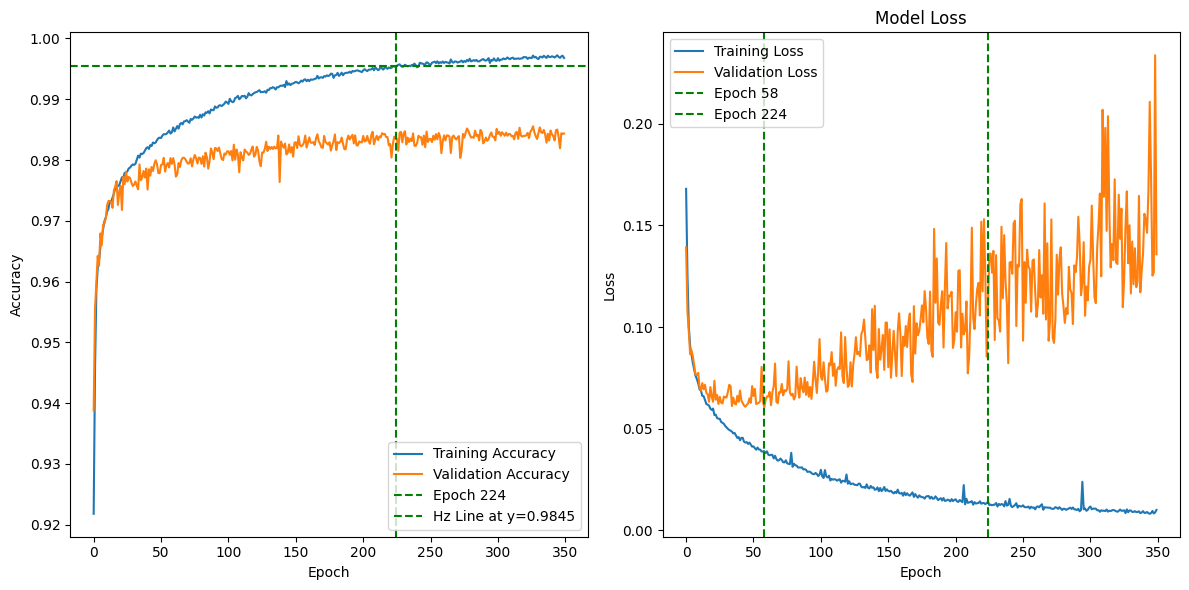

In [ ]:
import matplotlib.pyplot as plt

# Create a figure with subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

# Plot accuracy
axes[0].plot(history.history['accuracy'], label='Training Accuracy')
axes[0].plot(history.history['val_accuracy'], label='Validation Accuracy')
axes[0].axvline(x=224, color='g', linestyle='--', label='Epoch 224')  # Vertical line at epoch 60
axes[0].axhline(y=0.9954, color='g', linestyle='--', label='Hz Line at y=0.9845')
axes[0].set_xlabel('Epoch')
axes[0].set_ylabel('Accuracy')
axes[0].legend()

# Plot loss
axes[1].plot(history.history['loss'], label='Training Loss')
axes[1].plot(history.history['val_loss'], label='Validation Loss')
axes[1].axvline(x=58, color='g', linestyle='--', label='Epoch 58')  # Vertical line at epoch 60
axes[1].axvline(x=224, color='g', linestyle='--', label='Epoch 224')  # Vertical line at epoch 60
axes[1].set_title('Model Loss')
axes[1].set_xlabel('Epoch')
axes[1].set_ylabel('Loss')
axes[1].legend()

plt.tight_layout()
plt.show()


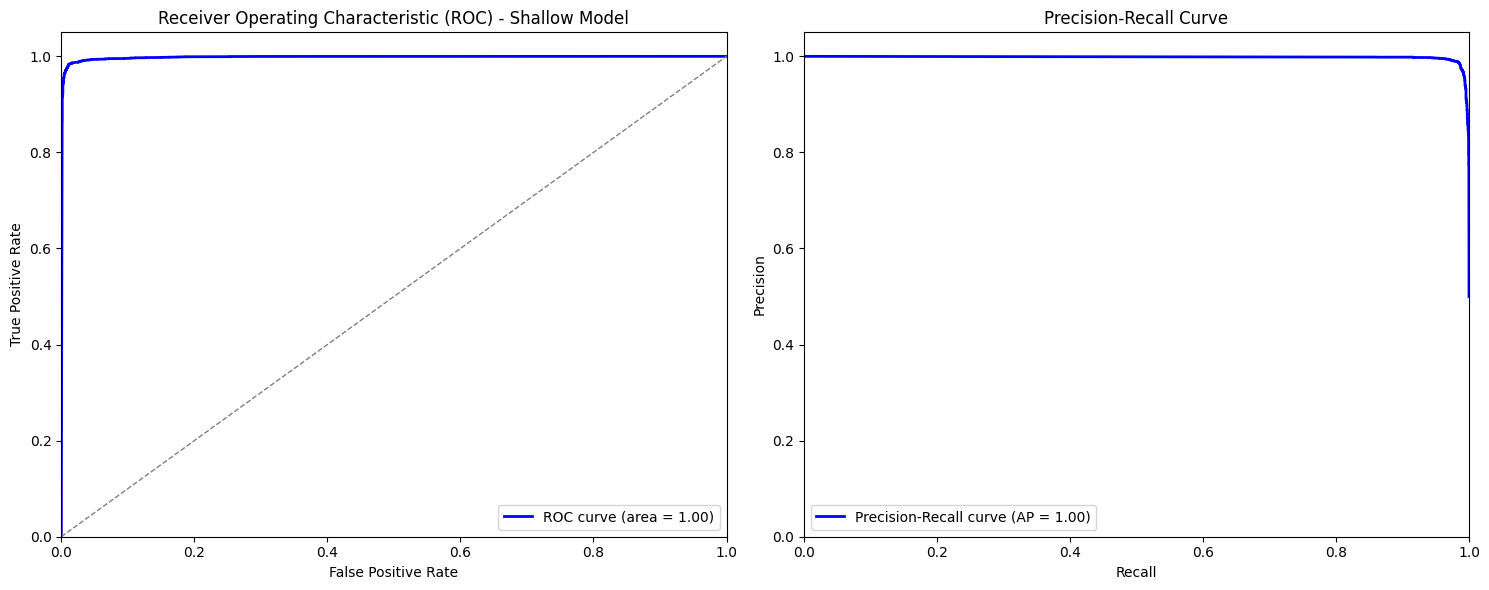

In [ ]:

from sklearn.metrics import roc_curve, auc, precision_recall_curve, average_precision_score
import matplotlib.pyplot as plt

# Calculate ROC curve
fpr, tpr, thresholds_roc = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

# Calculate Precision-Recall curve
precision, recall, thresholds_pr = precision_recall_curve(y_test, y_pred)
average_precision = average_precision_score(y_test, y_pred)

# Plot ROC curve and Precision-Recall curve as subplots
plt.figure(figsize=(15, 6))

# Plot ROC curve
plt.subplot(1, 2, 1)
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) - Shallow Model')
plt.legend(loc="lower right")

# Plot Precision-Recall curve
plt.subplot(1, 2, 2)
plt.plot(recall, precision, color='blue', lw=2, label='Precision-Recall curve (AP = %0.2f)' % average_precision)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc="lower left")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])

plt.tight_layout()
plt.show()




In [ ]:
from keras.callbacks import ModelCheckpoint

# Define the filepath to save the model
checkpoint_filepath = deep_model_path_best_hp

# Define a ModelCheckpoint callback to save the model with the highest validation accuracy
checkpoint = ModelCheckpoint(checkpoint_filepath,
                             monitor='val_accuracy',
                             save_best_only=True,
                             mode='max',
                             verbose=1)

# Build the model with the best hyperparameters
best_model = tuner.hypermodel.build(best_hps)

# Train the model with early stopping and ModelCheckpoint callback
history = best_model.fit(X_train, y_train,
                          epochs=224,
                          validation_split=0.2,
                          callbacks=[checkpoint])



NameError: name 'tuner' is not defined

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import LearningRateScheduler
from tensorflow.keras.regularizers import l1, l2  # Import l1 and l2 functions
import numpy as np
import time
import psutil
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, average_precision_score
from keras.callbacks import ModelCheckpoint

modelname = "deep_ann_model"
#hpt_method = "random search"

# Define a learning rate scheduler function
def lr_scheduler(epoch, lr):
    if epoch < 10:
        return lr
    else:
        return lr * tf.math.exp(-0.1)

# Update the model building function to include the new hyperparameters and configurations
def build_deep_ann_model(hp):
    model = Sequential()
    lu = hp['units']  # layer units
    # Input layer
    model.add(Dense(units=lu,
                    input_dim=len(features1),
                    activation=hp['activation_layer1'],
                    kernel_initializer=hp['weight_initializer'],
                    kernel_regularizer=l1(hp['regularization_strength']) if hp['regularization_type'] == 'l1' else
                    l2(hp['regularization_strength']) if hp['regularization_type'] == 'l2' else None))

    # Hidden layers
    for i in range(1, 7):
        lu = lu / 2
        model.add(Dense(units=lu,
                        activation=hp[f'activation_layer{i + 1}'],
                        kernel_initializer=hp['weight_initializer'],
                        kernel_regularizer=l1(hp['regularization_strength']) if hp['regularization_type'] == 'l1' else
                        l2(hp['regularization_strength']) if hp['regularization_type'] == 'l2' else None))

        # Dropout layer (optional)
        if hp['use_dropout']:
            model.add(Dropout(rate=hp['dropout_rate']))

    # Output layer
    model.add(Dense(1, activation='sigmoid'))

    # Define the learning rate scheduler
    lr_schedule = LearningRateScheduler(lr_scheduler)

    # Choose the optimizer based on the hyperparameter value
    optimizer = None
    if hp['optimizer'] == 'adam':
        optimizer = tf.keras.optimizers.Adam(learning_rate=hp['learning_rate'])
    elif hp['optimizer'] == 'rmsprop':
        optimizer = tf.keras.optimizers.RMSprop(learning_rate=hp['learning_rate'])
    elif hp['optimizer'] == 'sgd':
        optimizer = tf.keras.optimizers.SGD(learning_rate=hp['learning_rate'], momentum=0.9)

    model.compile(optimizer=optimizer,
                  loss='binary_crossentropy',
                  metrics=['accuracy'])

    return model

hp = {
    'units': 256,
    'activation_layer1': 'relu',
    'activation_layer2': 'relu',
    'activation_layer3': 'leaky_relu',
    'activation_layer4': 'relu',
    'activation_layer5': 'relu',
    'activation_layer6': 'relu',
    'activation_layer7': 'leaky_relu',
    'optimizer': 'adam',
    'learning_rate': 0.001,
    'weight_initializer': 'glorot_uniform',
    'batch_size': 16,
    'regularization_type': 'l2',
    'regularization_strength': 0.0,
    'use_lr_scheduler': 0,
    'use_dropout': 0,
    'dropout_rate': 0.4
}




# Define the filepath to save the model
checkpoint_filepath = deep_model_path_best_hp

# Define a ModelCheckpoint callback to save the model with the highest validation accuracy
checkpoint = ModelCheckpoint(checkpoint_filepath,
                             monitor='val_accuracy',
                             save_best_only=True,
                             mode='max',
                             verbose=1)

# Build the model with the best hyperparameters
#best_model = tuner.hypermodel.build(best_hps)
# Build the model
best_model = build_deep_ann_model(hp)
# Train the model with early stopping and ModelCheckpoint callback
history = best_model.fit(X_train, y_train,
                          epochs=224,
                          validation_split=0.2,
                          callbacks=[checkpoint])
# Train the model (assuming you have training data X_train, y_train)
#history = model.fit(X_train, y_train, batch_size=hp['batch_size'], epochs=224, validation_split=0.2)
# Train the model with early stopping and ModelCheckpoint callback

# Evaluate the model
loss, accuracy = best_model.evaluate(X_test, y_test)
print(f"Test Loss: {loss}, Test Accuracy: {accuracy}")

Epoch 1/224
4185/4185 [==============================] - ETA: 0s - loss: 0.1670 - accuracy: 0.9222
Epoch 1: val_accuracy improved from -inf to 0.92975, saving model to /content/drive/MyDrive/ANN_Edge/unsw_data/final4/models15000/deep_model_ANN5_hp.keras
4185/4185 [==============================] - 28s 6ms/step - loss: 0.1670 - accuracy: 0.9222 - val_loss: 0.1494 - val_accuracy: 0.9297
Epoch 2/224
4182/4185 [============================>.] - ETA: 0s - loss: 0.1286 - accuracy: 0.9434
Epoch 2: val_accuracy improved from 0.92975 to 0.95245, saving model to /content/drive/MyDrive/ANN_Edge/unsw_data/final4/models15000/deep_model_ANN5_hp.keras
4185/4185 [==============================] - 20s 5ms/step - loss: 0.1286 - accuracy: 0.9434 - val_loss: 0.1094 - val_accuracy: 0.9524
Epoch 3/224
4184/4185 [============================>.] - ETA: 0s - loss: 0.1011 - accuracy: 0.9570
Epoch 3: val_accuracy improved from 0.95245 to 0.95403, saving model to /content/drive/MyDrive/ANN_Edge/unsw_data/final4/m

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               10496     
                                                                 
 dense_1 (Dense)             (None, 128)               32896     
                                                                 
 dense_2 (Dense)             (None, 64)                8256      
                                                                 
 dense_3 (Dense)             (None, 32)                2080      
                                                                 
 dense_4 (Dense)             (None, 16)                528       
                                                                 
 dense_5 (Dense)             (None, 8)                 136       
                                                                 
 dense_6 (Dense)             (None, 4)                 3

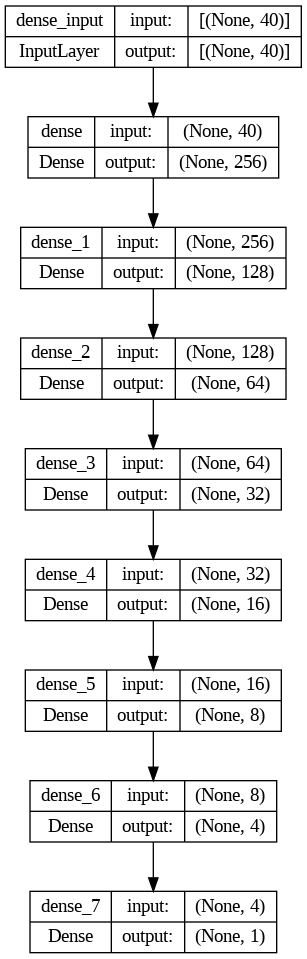

In [ ]:
from tensorflow.keras.utils import plot_model
from tensorflow.keras.models import load_model, Model

best_model =load_model(checkpoint_filepath)

# Display the summary of the loaded model
best_model.summary()

# Plot the architecture of the loaded model
plot_model(best_model, to_file='deep_model_best_plot40.png', show_shapes=True, show_layer_names=True)


Testing Deep Model

In [ ]:
import psutil
import time
from keras.models import load_model
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, average_precision_score
import tensorflow as tf

# Load the saved model
saved_model = load_model(checkpoint_filepath)

# Measure CPU and memory usage before prediction
cpu_usage_before = psutil.cpu_percent()
memory_usage_before = psutil.virtual_memory().used

# Record start time for prediction
start_time = time.time()

# Assuming X_test and y_test are your test data
# Predict on the test data
y_pred = saved_model.predict(X_test)

# Convert predicted probabilities to binary predictions (0 or 1)
y_pred_classes = (y_pred > 0.5).astype(int)

# Record end time for prediction
end_time = time.time()

# Measure CPU and memory usage after prediction
cpu_usage_after = psutil.cpu_percent()
memory_usage_after = psutil.virtual_memory().used

# Calculate prediction time
prediction_time = end_time - start_time

# Calculate performance metrics
accuracy = accuracy_score(y_test, y_pred_classes)
precision = precision_score(y_test, y_pred_classes)
recall = recall_score(y_test, y_pred_classes)
f1 = f1_score(y_test, y_pred_classes)
roc_auc = roc_auc_score(y_test, y_pred)
avg_precision = average_precision_score(y_test, y_pred)

# Compute confusion matrix
confusion_matrix = tf.math.confusion_matrix(y_test, y_pred_classes).numpy()

# Print performance metrics
print("Test Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("ROC AUC Score:", roc_auc)
print("Average Precision:", avg_precision)
print("Confusion Matrix:\n", confusion_matrix)

# Print CPU and memory usage, and prediction time
print("CPU usage before prediction:", cpu_usage_before)
print("Memory usage before prediction:", memory_usage_before)
print("CPU usage after prediction:", cpu_usage_after)
print("Memory usage after prediction:", memory_usage_after)
print("Prediction time:", prediction_time)



291/291 [==============================] - 1s 2ms/step
Test Accuracy: 0.9819354838709677
Precision: 0.9821428571428571
Recall: 0.9817204301075269
F1 Score: 0.9819315981931599
ROC AUC Score: 0.99785533587698
Average Precision: 0.9977304742597092
Confusion Matrix:
 [[4567   83]
 [  85 4565]]
CPU usage before prediction: 65.0
Memory usage before prediction: 1883688960
CPU usage after prediction: 62.7
Memory usage after prediction: 1883545600
Prediction time: 0.7970948219299316


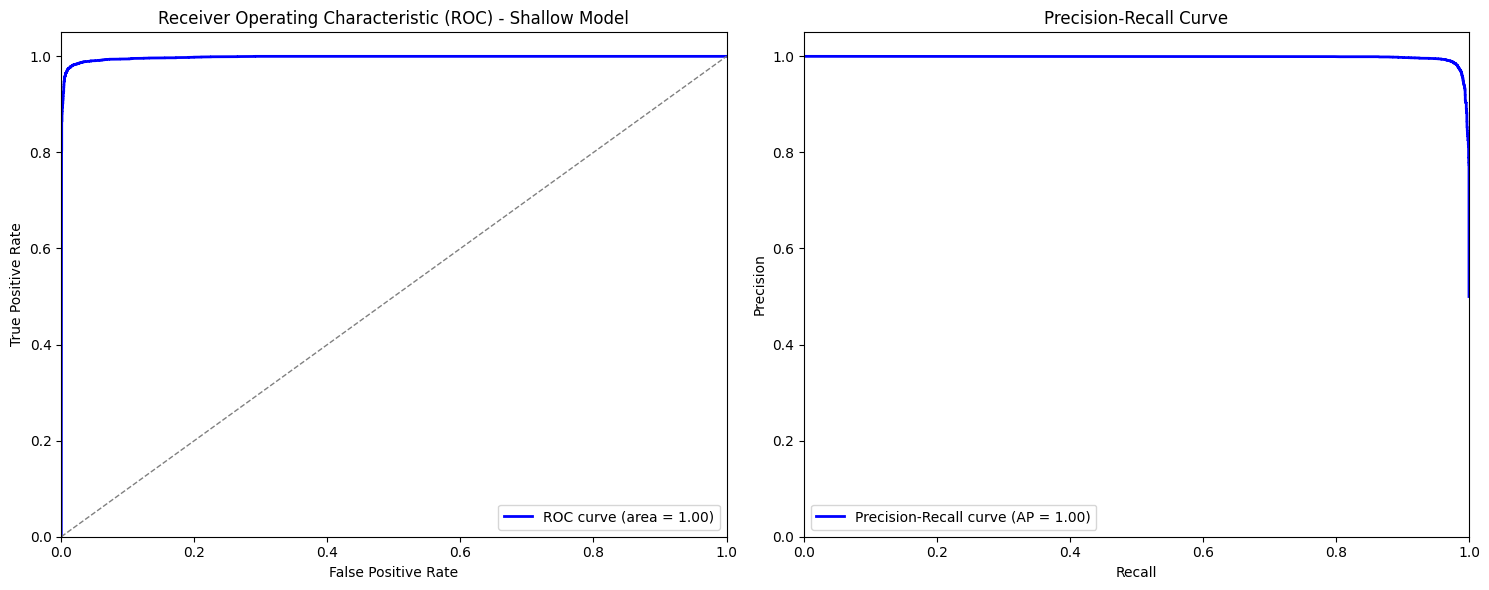

In [ ]:
from sklearn.metrics import roc_curve, auc, precision_recall_curve, average_precision_score
import matplotlib.pyplot as plt

# Calculate ROC curve
fpr, tpr, thresholds_roc = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

# Calculate Precision-Recall curve
precision, recall, thresholds_pr = precision_recall_curve(y_test, y_pred)
average_precision = average_precision_score(y_test, y_pred)

# Plot ROC curve and Precision-Recall curve as subplots
plt.figure(figsize=(15, 6))

# Plot ROC curve
plt.subplot(1, 2, 1)
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) - Shallow Model')
plt.legend(loc="lower right")

# Plot Precision-Recall curve
plt.subplot(1, 2, 2)
plt.plot(recall, precision, color='blue', lw=2, label='Precision-Recall curve (AP = %0.2f)' % average_precision)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc="lower left")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])

plt.tight_layout()
plt.show()


## Deep Model Validation

In [ ]:
import psutil
import time
import numpy as np
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, average_precision_score
import tensorflow as tf
from keras.models import load_model

# Load the best model saved by ModelCheckpoint
best_model = load_model(checkpoint_filepath)

# Measure CPU and memory usage before validation
cpu_usage_before = psutil.cpu_percent()
memory_usage_before = psutil.virtual_memory().used

# Record start time for validation
start_time = time.time()

# Validate the loaded best model using validation data
evaluation = best_model.evaluate(X_val, y_val)

# Record end time for validation
end_time = time.time()

# Measure CPU and memory usage after validation
cpu_usage_after = psutil.cpu_percent()
memory_usage_after = psutil.virtual_memory().used

# Calculate validation time
validation_time = end_time - start_time

# Print the evaluation metrics
print("Validation Loss:", evaluation[0])
print("Validation Accuracy:", evaluation[1])

# Assuming y_pred is the predicted probabilities and y_pred_classes are the predicted classes
y_pred = best_model.predict(X_val)
y_pred_classes = np.round(y_pred)

# Compute additional performance metrics
precision = precision_score(y_val, y_pred_classes)
recall = recall_score(y_val, y_pred_classes)
f1 = f1_score(y_val, y_pred_classes)
roc_auc = roc_auc_score(y_val, y_pred)
avg_precision = average_precision_score(y_val, y_pred)

# Compute confusion matrix
confusion_matrix = tf.math.confusion_matrix(y_val, y_pred_classes).numpy()

# Print additional performance metrics
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("ROC AUC Score:", roc_auc)
print("Average Precision:", avg_precision)
print("Confusion Matrix:\n", confusion_matrix)

# Print CPU and memory usage, and validation time
print("CPU usage before validation:", cpu_usage_before)
print("Memory usage before validation:", memory_usage_before)
print("CPU usage after validation:", cpu_usage_after)
print("Memory usage after validation:", memory_usage_after)
print("Validation time:", validation_time)



291/291 [==============================] - 1s 2ms/step - loss: 0.1029 - accuracy: 0.9809
Validation Loss: 0.10286572575569153
Validation Accuracy: 0.9808602333068848
291/291 [==============================] - 1s 2ms/step
Precision: 0.983982683982684
Recall: 0.9776344086021506
F1 Score: 0.9807982740021576
ROC AUC Score: 0.997272054572783
Average Precision: 0.9966386276670052
Confusion Matrix:
 [[4576   74]
 [ 104 4546]]
CPU usage before validation: 65.8
Memory usage before validation: 1882697728
CPU usage after validation: 65.2
Memory usage after validation: 1882955776
Validation time: 0.9843747615814209


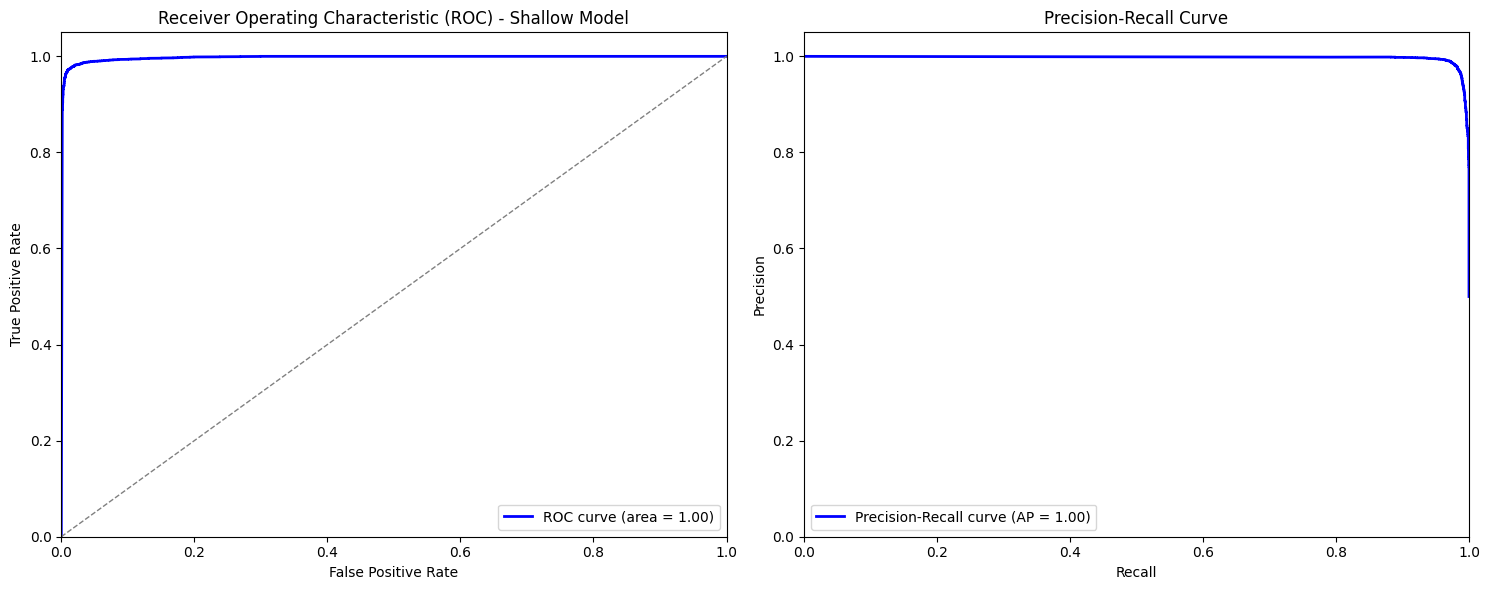

In [ ]:
from sklearn.metrics import roc_curve, auc, precision_recall_curve, average_precision_score
import matplotlib.pyplot as plt

# Calculate ROC curve
fpr, tpr, thresholds_roc = roc_curve(y_val, y_pred)
roc_auc = auc(fpr, tpr)

# Calculate Precision-Recall curve
precision, recall, thresholds_pr = precision_recall_curve(y_val, y_pred)
average_precision = average_precision_score(y_val, y_pred)

# Plot ROC curve and Precision-Recall curve as subplots
plt.figure(figsize=(15, 6))

# Plot ROC curve
plt.subplot(1, 2, 1)
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) - Shallow Model')
plt.legend(loc="lower right")

# Plot Precision-Recall curve
plt.subplot(1, 2, 2)
plt.plot(recall, precision, color='blue', lw=2, label='Precision-Recall curve (AP = %0.2f)' % average_precision)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc="lower left")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])

plt.tight_layout()
plt.show()




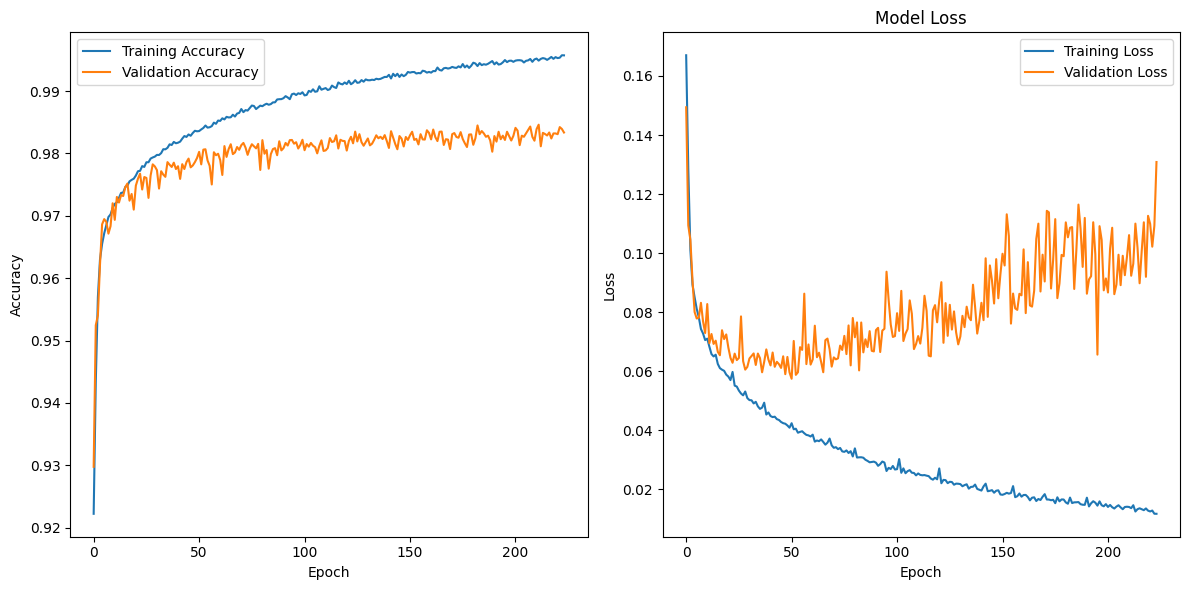

In [ ]:
# Create a figure with subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

# Plot accuracy
axes[0].plot(history.history['accuracy'], label='Training Accuracy')
axes[0].plot(history.history['val_accuracy'], label='Validation Accuracy')
#axes[0].axvline(x=224, color='g', linestyle='--', label='Epoch 224')  # Vertical line at epoch 60
#axes[0].axhline(y=0.9954, color='g', linestyle='--', label='Hz Line at y=0.9845')
axes[0].set_xlabel('Epoch')
axes[0].set_ylabel('Accuracy')
axes[0].legend()

# Plot loss
axes[1].plot(history.history['loss'], label='Training Loss')
axes[1].plot(history.history['val_loss'], label='Validation Loss')
#axes[1].axvline(x=58, color='g', linestyle='--', label='Epoch 58')  # Vertical line at epoch 60
#axes[1].axvline(x=224, color='g', linestyle='--', label='Epoch 224')  # Vertical line at epoch 60
axes[1].set_title('Model Loss')
axes[1].set_xlabel('Epoch')
axes[1].set_ylabel('Loss')
axes[1].legend()

plt.tight_layout()
plt.show()


In [ ]:
import datetime

# Get the current datetime
current_datetime = datetime.datetime.now()

# Add a time delta (5 hours and 30 minutes)
time_delta = datetime.timedelta(hours=5, minutes=30)
updated_datetime = current_datetime + time_delta

# Format the updated datetime
formatted_datetime = updated_datetime.strftime("%Y-%m-%d %H:%M:%S")
print("Updated Datetime:", formatted_datetime)

Updated Datetime: 2024-04-14 08:01:30
